total checkpoint 10
'Source'
1. diponegoro
2. imam bonjol
3. a yani
4. gajah mada
5. sudirman
6. brantas
7. patimura
8. trunojoyo
9. arumdalu
10. mojorejo

'Tanggal' dari 23-39 atau senin-minggu

# cleaning  dari hasil seminggu untuk diambil pola atau proporsi

In [1]:
import pandas as pd

# --- Tahap 1: Cleaning Data Harian ---

tanggal_list = [23, 24, 25, 26, 27, 28, 29]

nama_checkpoint = [
    "diponegoro", "imam bonjol", "a yani", "gajah mada", "sudirman",
    "brantas", "patimura", "trunojoyo", "arumdalu", "mojorejo"
]

for tanggal in tanggal_list:
    file_path = f"C:\\Dokumen\\dishub\\dashboard\\Juni\\Data Juni\\tanggal {tanggal} juni.xlsx"
    dfs = pd.read_excel(file_path, sheet_name=None)

    mapping = {f"{i+1}. {tanggal} juni": nama_checkpoint[i] for i in range(10)}

    df_list = []
    for sheet_name, df in dfs.items():
        if sheet_name in mapping:
            df["Source"] = mapping[sheet_name]
            df_list.append(df)
        else:
            print(f"Sheet '{sheet_name}' diabaikan")

    df_final = pd.concat(df_list, ignore_index=True)

    # Buang baris semua jam bernilai 0
    jam_cols = [col for col in df_final.columns if ":" in str(col)]
    mask_semua_0 = (df_final[jam_cols] == 0).all(axis=1)
    df_bersih = df_final[~mask_semua_0]

    # Simpan per tanggal
    output_name = f"C:\\Dokumen\\dishub\\dashboard\\Juni\\Data Juni\\dataset_bersih_{tanggal}juni.xlsx"
    df_bersih.to_excel(output_name, index=False)
    print(f"Tanggal {tanggal} selesai ➜ {output_name} (baris: {len(df_bersih)})")


Sheet 'rekap keseluruhan 23 juni' diabaikan
Tanggal 23 selesai ➜ C:\Dokumen\dishub\dashboard\Juni\Data Juni\dataset_bersih_23juni.xlsx (baris: 96)
Sheet 'rekap tgl 24' diabaikan
Tanggal 24 selesai ➜ C:\Dokumen\dishub\dashboard\Juni\Data Juni\dataset_bersih_24juni.xlsx (baris: 97)
Sheet 'rekap tgl 25' diabaikan
Tanggal 25 selesai ➜ C:\Dokumen\dishub\dashboard\Juni\Data Juni\dataset_bersih_25juni.xlsx (baris: 97)
Sheet '26' diabaikan
Tanggal 26 selesai ➜ C:\Dokumen\dishub\dashboard\Juni\Data Juni\dataset_bersih_26juni.xlsx (baris: 96)
Sheet '27' diabaikan
Tanggal 27 selesai ➜ C:\Dokumen\dishub\dashboard\Juni\Data Juni\dataset_bersih_27juni.xlsx (baris: 95)
Sheet '28' diabaikan
Tanggal 28 selesai ➜ C:\Dokumen\dishub\dashboard\Juni\Data Juni\dataset_bersih_28juni.xlsx (baris: 97)
Sheet '29' diabaikan
Tanggal 29 selesai ➜ C:\Dokumen\dishub\dashboard\Juni\Data Juni\dataset_bersih_29juni.xlsx (baris: 97)


In [2]:
# --- Tahap 2: Gabungkan Dataset Mingguan ---

weekly_df_list = []

for tanggal in tanggal_list:
    file_path = f"C:\\Dokumen\\dishub\\dashboard\\Juni\\Data Juni\\dataset_bersih_{tanggal}juni.xlsx"
    df = pd.read_excel(file_path)
    df["Tanggal"] = f"{tanggal}-06-2025"
    weekly_df_list.append(df)

df_mingguan = pd.concat(weekly_df_list, ignore_index=True)
output_path = "C:\\Dokumen\\dishub\\dashboard\\Juni\\Data Juni\\dataset_bersih_mingguan_23-29.xlsx"
df_mingguan.to_excel(output_path, index=False)

print(f"✅ Dataset mingguan selesai ({len(df_mingguan)} baris) ➜ {output_path}")


✅ Dataset mingguan selesai (675 baris) ➜ C:\Dokumen\dishub\dashboard\Juni\Data Juni\dataset_bersih_mingguan_23-29.xlsx


In [3]:
# --- Tahap 3: Final Cleaning, Mapping, dan Grouping ---

# Load data mingguan
df = pd.read_excel("C:\\Dokumen\\dishub\\dashboard\\Juni\\Data Juni\\dataset_bersih_mingguan_23-29.xlsx")

# Mapping jenis kendaraan
jenis_map = {
    "Large-Sized Coach": "Bus",
    "Light Truck": "Truck",
    "Minivan": "Roda 4",
    "Pedestrian": "Pejalan kaki",
    "Pick-up Truck": "Pick-up",
    "SUV/MPV": "Roda 4",
    "Sedan": "Roda 4",
    "Tricycle": "Tossa",
    "Truck": "Truck",
    "Two Wheeler": "Sepeda motor"
}
df["Jenis Kendaraan"] = df["Jenis Kendaraan"].replace(jenis_map)

# Mapping Source ke keterangan arah
keterangan_map = {
    "diponegoro": "Keluar Batu",
    "imam bonjol": "Batu",
    "a yani": "Batu",
    "gajah mada": "Batu",
    "sudirman": "Keluar Batu",
    "brantas": "Masuk Batu",
    "patimura": "Masuk Batu",
    "trunojoyo": "Masuk Batu",
    "arumdalu": "Masuk Batu",
    "mojorejo": "Masuk Batu"
}
df["Keterangan"] = df["Source"].map(keterangan_map)

# Grouping untuk menghindari duplikasi
jam_cols = [col for col in df.columns if ":" in str(col)]
kolom_awal = ["Source", "Jenis Kendaraan", "Tanggal", "Keterangan"]
df_grouped = df.groupby(kolom_awal, as_index=False)[jam_cols].sum()

# Simpan final dataset
final_output_path = "C:\\Dokumen\\dishub\\dashboard\\Juni\\Data Juni\\dataset_final cleaning_23-29.xlsx"
df_grouped.to_excel(final_output_path, index=False)

print("✅ File akhir disimpan di:", final_output_path)
display(df_grouped.head())


✅ File akhir disimpan di: C:\Dokumen\dishub\dashboard\Juni\Data Juni\dataset_final cleaning_23-29.xlsx


,Source,Jenis Kendaraan,Tanggal,Keterangan,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,a yani,Bus,23-06-2025,Batu,2,2,0,2,1,2,...,7,13,4,9,10,10,7,3,0,0
1,a yani,Bus,24-06-2025,Batu,2,1,0,1,0,1,...,8,11,10,2,14,9,11,8,2,2
2,a yani,Bus,25-06-2025,Batu,2,2,0,0,2,3,...,13,6,9,6,11,4,5,5,1,1
3,a yani,Bus,26-06-2025,Batu,2,1,1,0,1,2,...,4,9,4,4,5,7,6,4,1,4
4,a yani,Bus,27-06-2025,Batu,1,0,0,0,1,1,...,14,8,9,5,12,7,15,15,4,3


final cleaning /content/drive/MyDrive/Dishub/dataset_final cleaning_23-29.xlsx


# membuat dataset waktu sebulan Juni

berdasarkan dari rekap keseluruhan (data volume)


ini blm clean:
per jenis kendaraan /content/drive/MyDrive/Dishub/rekap_total_jenis_kendaraan_bulanan_pertanggal.xlsx

per checkpoint /content/drive/MyDrive/Dishub/rekap_total_cp_bulanan_pertanggal.xlsx




## per jenis kendaraan

In [4]:
import pandas as pd

file_path = "C:\\Dokumen\\dishub\\dashboard\\Juni\\Data Juni\\Data Volume Lalu Lintas Juni.xlsx"
sheet_names = [str(i) for i in range(1, 31)]
list_df = []

def dedup_columns(cols):
    counts = {}
    new_cols = []
    for col in cols:
        if col not in counts:
            counts[col] = 1
            new_cols.append(col)
        else:
            counts[col] += 1
            new_cols.append(f"{col}.{counts[col]}")
    return new_cols

for sheet in sheet_names:
    print(f"Memproses sheet: {sheet}")
    df_raw = pd.read_excel(file_path, sheet_name=sheet, header=None)

    start_idx = df_raw[df_raw[0].astype(str).str.contains("Jenis Kendaraan", case=False, na=False)].index[0] + 1

    header_row = df_raw.iloc[start_idx - 1].fillna("NA").astype(str)

    if header_row.duplicated().any():
        print(f"➜ Duplikat header di sheet {sheet} ➜ auto rename")
        header_row = dedup_columns(header_row)

    df_jenis = df_raw.iloc[start_idx:].copy()
    df_jenis.columns = header_row


    mask_arah = df_jenis.apply(
         lambda row: row.astype(str).str.contains(r"Arah|Keterangan|:", case=False, na=False).any(),
    axis=1
    )
    df_jenis = df_jenis[~mask_arah]


    df_jenis = df_jenis[df_jenis["Jenis Kendaraan"].notna()]
    df_jenis = df_jenis[~df_jenis["Jenis Kendaraan"].astype(str).str.lower().str.contains("total")]


    # Tambah Tanggal
    df_jenis["Tanggal"] = f"{sheet}-06-2025"

    list_df.append(df_jenis)

print("➜ Semua sheet OK ➜ Menggabungkan ...")
df_bulanan = pd.concat(list_df, ignore_index=True)

df_bulanan.to_excel("C:\\Dokumen\\dishub\\dashboard\\Juni\\Data Juni\\rekap_total_jenis_kendaraan_bulanan_pertanggal.xlsx", index=False)
print("✅ File jadi: rekap_jenis_kendaraan_bulanan_pertanggal.xlsx")

Memproses sheet: 1
➜ Duplikat header di sheet 1 ➜ auto rename
Memproses sheet: 2
➜ Duplikat header di sheet 2 ➜ auto rename
Memproses sheet: 3
➜ Duplikat header di sheet 3 ➜ auto rename
Memproses sheet: 4
➜ Duplikat header di sheet 4 ➜ auto rename
Memproses sheet: 5
➜ Duplikat header di sheet 5 ➜ auto rename
Memproses sheet: 6
➜ Duplikat header di sheet 6 ➜ auto rename
Memproses sheet: 7
➜ Duplikat header di sheet 7 ➜ auto rename
Memproses sheet: 8
➜ Duplikat header di sheet 8 ➜ auto rename
Memproses sheet: 9
➜ Duplikat header di sheet 9 ➜ auto rename
Memproses sheet: 10
➜ Duplikat header di sheet 10 ➜ auto rename
Memproses sheet: 11
➜ Duplikat header di sheet 11 ➜ auto rename
Memproses sheet: 12
➜ Duplikat header di sheet 12 ➜ auto rename
Memproses sheet: 13
➜ Duplikat header di sheet 13 ➜ auto rename
Memproses sheet: 14
➜ Duplikat header di sheet 14 ➜ auto rename
Memproses sheet: 15
➜ Duplikat header di sheet 15 ➜ auto rename
Memproses sheet: 16
➜ Duplikat header di sheet 16 ➜ auto r

In [7]:
display(df_bulanan)

,Jenis Kendaraan,Time,NA,NA.2,NA.3,NA.4,NA.5,NA.6,NA.7,NA.8,...,NA.16,NA.17,NA.18,NA.19,NA.20,NA.21,NA.22,NA.23,Total,Tanggal
0,Truk,87,101,76,69,82,98,111,172,199,...,225,206,222,153,151,128,111,89,3551,1-06-2025
1,Bus,15,23,15,15,26,31,41,57,139,...,50,66,69,56,54,38,36,17,1325,1-06-2025
2,Pick up Truck,18,8,16,10,9,28,35,41,46,...,71,61,57,47,34,22,21,14,1012,1-06-2025
3,Light Truck,87,96,72,57,91,112,168,191,218,...,230,171,151,136,140,121,101,70,3778,1-06-2025
4,Sedan,276,273,145,131,131,247,275,465,633,...,1055,1037,1130,1016,754,627,419,288,15706,1-06-2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,SUV/MPV,449,289,190,218,282,507,947,1430,1650,...,2396,2286,2235,2171,1941,1593,1048,724,37144,30-06-2025
326,Roda 3,11,12,17,11,19,25,29,23,46,...,63,69,129,123,94,75,24,20,1155,30-06-2025
327,Roda 2,1872,1335,933,936,1350,3262,6962,10405,8365,...,9230,9354,9138,8383,8193,7216,4493,2940,147163,30-06-2025
328,Pedestrian,6,9,3,7,26,80,109,68,68,...,556,578,383,271,253,161,36,21,6584,30-06-2025


## per rekap total perhari (checkpoint)

In [8]:
import pandas as pd

file_path = "C:\\Dokumen\\dishub\\dashboard\\data\\Data Volume Lalu Lintas Juni.xlsx"
sheet_names = [str(i) for i in range(1, 31)]
list_df = []

def dedup_columns(cols):
    counts = {}
    new_cols = []
    for col in cols:
        if col not in counts:
            counts[col] = 1
            new_cols.append(col)
        else:
            counts[col] += 1
            new_cols.append(f"{col}.{counts[col]}")
    return new_cols

for sheet in sheet_names:
    print(f"📄 Memproses sheet: {sheet}")
    df_raw = pd.read_excel(file_path, sheet_name=sheet, header=None)


    start_idx = df_raw[df_raw[0].astype(str).str.contains("Checkpoint", case=False, na=False)].index[0] + 1
    header_row = df_raw.iloc[start_idx - 1].fillna("NA").astype(str)


    if header_row.duplicated().any():
        print(f"➜ Duplikat header di sheet {sheet} ➜ auto rename")
        header_row = dedup_columns(header_row)


    df_cp = df_raw.iloc[start_idx:].copy()
    df_cp.columns = header_row

    # ketemu 2 baris kosong stop scrapping
    stop_idx = None
    kosong_count = 0
    for i, row in df_cp.iterrows():
        if row.isnull().all():
            kosong_count += 1
            if kosong_count == 2:
                stop_idx = i - 1
                break
        else:
            kosong_count = 0

    if stop_idx is not None:
        df_cp = df_cp.loc[:stop_idx]


    mask_arahcp = df_cp.apply(
        lambda row: row.astype(str).str.contains(r"Jenis Kendaraan|Arah|Keterangan|:", case=False, na=False).any(),
        axis=1
    )
    df_cp = df_cp[~mask_arahcp]


    df_cp = df_cp[df_cp["Checkpoint"].notna()]
    df_cp = df_cp[~df_cp["Checkpoint"].astype(str).str.lower().str.contains("total")]

    # Tambahkan kolom tanggal
    df_cp["Tanggal"] = f"{sheet}-06-2025"

    list_df.append(df_cp)

print("✅ Semua sheet OK ➜ Menggabungkan ...")
df_bulanancp = pd.concat(list_df, ignore_index=True)

output_path = "C:\\Dokumen\\dishub\\dashboard\\data\\rekap_total_cp_bulanan_pertanggal.xlsx"
df_bulanancp.to_excel(output_path, index=False)
print(f"🎉 File jadi: {output_path}")


📄 Memproses sheet: 1
➜ Duplikat header di sheet 1 ➜ auto rename
📄 Memproses sheet: 2
➜ Duplikat header di sheet 2 ➜ auto rename
📄 Memproses sheet: 3
➜ Duplikat header di sheet 3 ➜ auto rename
📄 Memproses sheet: 4
➜ Duplikat header di sheet 4 ➜ auto rename
📄 Memproses sheet: 5
➜ Duplikat header di sheet 5 ➜ auto rename
📄 Memproses sheet: 6
➜ Duplikat header di sheet 6 ➜ auto rename
📄 Memproses sheet: 7
➜ Duplikat header di sheet 7 ➜ auto rename
📄 Memproses sheet: 8
➜ Duplikat header di sheet 8 ➜ auto rename
📄 Memproses sheet: 9
➜ Duplikat header di sheet 9 ➜ auto rename
📄 Memproses sheet: 10
➜ Duplikat header di sheet 10 ➜ auto rename
📄 Memproses sheet: 11
➜ Duplikat header di sheet 11 ➜ auto rename
📄 Memproses sheet: 12
➜ Duplikat header di sheet 12 ➜ auto rename
📄 Memproses sheet: 13
➜ Duplikat header di sheet 13 ➜ auto rename
📄 Memproses sheet: 14
➜ Duplikat header di sheet 14 ➜ auto rename
📄 Memproses sheet: 15
➜ Duplikat header di sheet 15 ➜ auto rename
📄 Memproses sheet: 16
➜ Dupl

# cleaning

menggati nama jenis kendaraan, mengganti nama checkpoint (cp), mengganti nama kolom agar sesuai

### per jenis

In [9]:
import pandas as pd


input_path = "C:\\Dokumen\\dishub\\dashboard\\data\\rekap_total_jenis_kendaraan_bulanan_pertanggal.xlsx"
output_path = "C:\\Dokumen\\dishub\\dashboard\\data\\rekap_bersih_total_jenis_kendaraan_bulanan_pertanggal.xlsx"


df_jenis = pd.read_excel(input_path)

# ubah nama kolom jam
jam_list = [f"{str(i).zfill(2)}:00:00" for i in range(24)]
columns = list(df_jenis.columns)
columns[1:25] = jam_list
df_jenis.columns = columns

# Mapping jenis kendaraan
jenis_map = {
    "Truk": "Truck",
    "Light Truck": "Truck",
    "Bus": "Bus",
    "Pick up Truck": "Pick-up",
    "Sedan": "Roda 4",
    "Minivan": "Roda 4",
    "SUV/MPV": "Roda 4",
    "Roda 3": "Tossa",
    "Roda 2": "Sepeda motor",
    "Pedestrian": "Pejalan kaki",
    "Unknown": "Unknown"
}
df_jenis['Jenis Kendaraan'] = df_jenis['Jenis Kendaraan'].map(jenis_map)


df_jenis = df_jenis.groupby(['Tanggal', 'Jenis Kendaraan'], as_index=False)[jam_list + ['Total']].sum()


df_jenis = df_jenis.sort_values(by=['Tanggal', 'Jenis Kendaraan']).reset_index(drop=True)


df_jenis.to_excel(output_path, index=False)


print("✅ Rekap jenis kendaraan selesai disimpan ke:")
print(output_path)
print("\n📊 Data types:")
print(df_jenis.dtypes)

# Preview hasil
display(df_jenis)


✅ Rekap jenis kendaraan selesai disimpan ke:
C:\Dokumen\dishub\dashboard\data\rekap_bersih_total_jenis_kendaraan_bulanan_pertanggal.xlsx

📊 Data types:
Tanggal             object
Jenis Kendaraan     object
00:00:00           float64
01:00:00           float64
02:00:00           float64
03:00:00           float64
04:00:00           float64
05:00:00           float64
06:00:00           float64
07:00:00           float64
08:00:00           float64
09:00:00           float64
10:00:00           float64
11:00:00           float64
12:00:00           float64
13:00:00           float64
14:00:00           float64
15:00:00           float64
16:00:00           float64
17:00:00           float64
18:00:00           float64
19:00:00           float64
20:00:00           float64
21:00:00           float64
22:00:00           float64
23:00:00           float64
Total                int64
dtype: object


,Tanggal,Jenis Kendaraan,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Total
0,1-06-2025,Bus,15.0,23.0,15.0,15.0,26.0,31.0,41.0,57.0,...,106.0,50.0,66.0,69.0,56.0,54.0,38.0,36.0,17.0,1325
1,1-06-2025,Pejalan kaki,17.0,17.0,13.0,4.0,25.0,87.0,205.0,90.0,...,108.0,133.0,119.0,59.0,74.0,60.0,43.0,38.0,38.0,1717
2,1-06-2025,Pick-up,18.0,8.0,16.0,10.0,9.0,28.0,35.0,41.0,...,78.0,71.0,61.0,57.0,47.0,34.0,22.0,21.0,14.0,1012
3,1-06-2025,Roda 4,925.0,766.0,420.0,384.0,472.0,920.0,1267.0,1885.0,...,4408.0,4156.0,3690.0,3665.0,3216.0,2538.0,2019.0,1343.0,828.0,59142
4,1-06-2025,Sepeda motor,3349.0,2549.0,1677.0,1834.0,2235.0,3911.0,6083.0,7710.0,...,11103.0,12289.0,11857.0,11233.0,10470.0,8424.0,7068.0,5359.0,3368.0,180632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,9-06-2025,Roda 4,380.0,223.0,312.0,331.0,360.0,650.0,1427.0,1920.0,...,3484.0,3465.0,3076.0,3270.0,3120.0,2795.0,2096.0,1383.0,902.0,51480
236,9-06-2025,Sepeda motor,860.0,514.0,490.0,794.0,877.0,2150.0,5160.0,8809.0,...,10205.0,11323.0,9672.0,9490.0,9469.0,8122.0,6779.0,4856.0,3161.0,153869
237,9-06-2025,Tossa,10.0,4.0,17.0,17.0,14.0,15.0,23.0,24.0,...,46.0,49.0,38.0,40.0,32.0,29.0,18.0,14.0,11.0,723
238,9-06-2025,Truck,103.0,92.0,121.0,115.0,137.0,232.0,331.0,480.0,...,665.0,568.0,516.0,480.0,414.0,399.0,263.0,298.0,266.0,10439


## per cp

In [10]:
import pandas as pd


input_path = "C:\\Dokumen\\dishub\\dashboard\\data\\rekap_total_cp_bulanan_pertanggal.xlsx"
output_path = "C:\\Dokumen\\dishub\\dashboard\\data\\rekap_bersih_total_cp_bulanan_pertanggal.xlsx"


df_cp = pd.read_excel(input_path)


jam_list = [f"{str(i).zfill(2)}:00:00" for i in range(24)]

# Ganti nama kolom jam
columns_cp = list(df_cp.columns)
columns_cp[1:25] = jam_list
df_cp.columns = columns_cp


df_cp.rename(columns={"Checkpoint": "Source"}, inplace=True)


checkpoint_map = {
    "Jl P.Sudirman - Trunojoyo Timur": "sudirman",
    "Jl. Imam Bonjol Batos Barat": "imam bonjol",
    "Jl Gajah Mada": "gajah mada",
    "Simpang Mojorejo": "mojorejo",
    "Jl. Diponegoro Batos": "diponegoro",
    "Jl. Patimura": "patimura",
    "Jl. Brantas": "brantas",
    "Jl A. Yani depan BCA": "a yani",
    "Simpang Arumdalu": "arumdalu",
    "Jl. Trunojoyo - P. Sudirman Barat": "trunojoyo"
}
df_cp['Source'] = df_cp['Source'].map(checkpoint_map)


if 'Tanggal' in df_cp.columns:
    df_cp = df_cp.sort_values(by=['Tanggal', 'Source']).reset_index(drop=True)


df_cp.to_excel(output_path, index=False)


print("✅ Rekap checkpoint selesai disimpan ke:")
print(output_path)
print("\n📊 Data types:")
print(df_cp.dtypes)


display(df_cp)


✅ Rekap checkpoint selesai disimpan ke:
C:\Dokumen\dishub\dashboard\data\rekap_bersih_total_cp_bulanan_pertanggal.xlsx

📊 Data types:
Source      object
00:00:00     int64
01:00:00     int64
02:00:00     int64
03:00:00     int64
04:00:00     int64
05:00:00     int64
06:00:00     int64
07:00:00     int64
08:00:00     int64
09:00:00     int64
10:00:00     int64
11:00:00     int64
12:00:00     int64
13:00:00     int64
14:00:00     int64
15:00:00     int64
16:00:00     int64
17:00:00     int64
18:00:00     int64
19:00:00     int64
20:00:00     int64
21:00:00     int64
22:00:00     int64
23:00:00     int64
Total        int64
Tanggal     object
dtype: object


,Source,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Total,Tanggal
0,a yani,251,154,82,74,106,239,513,715,931,...,1268,1173,1190,1261,997,811,510,294,18197,1-06-2025
1,arumdalu,800,687,510,495,573,913,1448,1775,1853,...,2500,2400,2095,1756,1447,1179,891,608,37238,1-06-2025
2,brantas,261,213,243,217,355,676,1134,1383,1492,...,1930,1690,1727,1391,949,787,554,326,28115,1-06-2025
3,diponegoro,644,515,210,218,270,439,593,896,1283,...,2657,2406,2437,2255,2017,1687,1123,681,34610,1-06-2025
4,gajah mada,415,279,218,177,311,536,876,1034,1163,...,1613,1533,1460,1444,1192,924,759,467,24124,1-06-2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,imam bonjol,0,0,22,17,24,62,151,271,345,...,688,477,589,756,659,500,293,178,8816,9-06-2025
296,mojorejo,0,0,87,55,94,253,557,1129,1259,...,1645,1431,1572,2137,1855,1583,1171,802,25373,9-06-2025
297,patimura,0,0,285,344,409,724,1407,2158,2138,...,2230,2171,2194,1900,1788,1442,1003,686,36171,9-06-2025
298,sudirman,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9-06-2025


# mulai membuat rekapan

proporsi untuk menghitung berapa persen tiap jenis per cp

dan sudah ada rekapan sebulan juni


In [11]:
import pandas as pd

df_jenis = pd.read_excel("C:\\Dokumen\\dishub\\dashboard\\data\\rekap_bersih_total_jenis_kendaraan_bulanan_pertanggal.xlsx")

df_cp = pd.read_excel("C:\\Dokumen\\dishub\\dashboard\\data\\rekap_bersih_total_cp_bulanan_pertanggal.xlsx")

df_seminggu = pd.read_excel("C:\\Dokumen\\dishub\\dashboard\\data\\dataset_final cleaning_23-29.xlsx")

print("jenis")
display(df_jenis)
print("cp")
display(df_cp)
print("seminggu")
display(df_seminggu)


jenis


,Tanggal,Jenis Kendaraan,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Total
0,1-06-2025,Bus,15,23,15,15,26,31,41,57,...,106,50,66,69,56,54,38,36,17,1325
1,1-06-2025,Pejalan kaki,17,17,13,4,25,87,205,90,...,108,133,119,59,74,60,43,38,38,1717
2,1-06-2025,Pick-up,18,8,16,10,9,28,35,41,...,78,71,61,57,47,34,22,21,14,1012
3,1-06-2025,Roda 4,925,766,420,384,472,920,1267,1885,...,4408,4156,3690,3665,3216,2538,2019,1343,828,59142
4,1-06-2025,Sepeda motor,3349,2549,1677,1834,2235,3911,6083,7710,...,11103,12289,11857,11233,10470,8424,7068,5359,3368,180632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,9-06-2025,Roda 4,380,223,312,331,360,650,1427,1920,...,3484,3465,3076,3270,3120,2795,2096,1383,902,51480
236,9-06-2025,Sepeda motor,860,514,490,794,877,2150,5160,8809,...,10205,11323,9672,9490,9469,8122,6779,4856,3161,153869
237,9-06-2025,Tossa,10,4,17,17,14,15,23,24,...,46,49,38,40,32,29,18,14,11,723
238,9-06-2025,Truck,103,92,121,115,137,232,331,480,...,665,568,516,480,414,399,263,298,266,10439


cp


,Source,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Total,Tanggal
0,a yani,251,154,82,74,106,239,513,715,931,...,1268,1173,1190,1261,997,811,510,294,18197,1-06-2025
1,arumdalu,800,687,510,495,573,913,1448,1775,1853,...,2500,2400,2095,1756,1447,1179,891,608,37238,1-06-2025
2,brantas,261,213,243,217,355,676,1134,1383,1492,...,1930,1690,1727,1391,949,787,554,326,28115,1-06-2025
3,diponegoro,644,515,210,218,270,439,593,896,1283,...,2657,2406,2437,2255,2017,1687,1123,681,34610,1-06-2025
4,gajah mada,415,279,218,177,311,536,876,1034,1163,...,1613,1533,1460,1444,1192,924,759,467,24124,1-06-2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,imam bonjol,0,0,22,17,24,62,151,271,345,...,688,477,589,756,659,500,293,178,8816,9-06-2025
296,mojorejo,0,0,87,55,94,253,557,1129,1259,...,1645,1431,1572,2137,1855,1583,1171,802,25373,9-06-2025
297,patimura,0,0,285,344,409,724,1407,2158,2138,...,2230,2171,2194,1900,1788,1442,1003,686,36171,9-06-2025
298,sudirman,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9-06-2025


seminggu


,Source,Jenis Kendaraan,Tanggal,Keterangan,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,a yani,Bus,23-06-2025,Batu,2,2,0,2,1,2,...,7,13,4,9,10,10,7,3,0,0
1,a yani,Bus,24-06-2025,Batu,2,1,0,1,0,1,...,8,11,10,2,14,9,11,8,2,2
2,a yani,Bus,25-06-2025,Batu,2,2,0,0,2,3,...,13,6,9,6,11,4,5,5,1,1
3,a yani,Bus,26-06-2025,Batu,2,1,1,0,1,2,...,4,9,4,4,5,7,6,4,1,4
4,a yani,Bus,27-06-2025,Batu,1,0,0,0,1,1,...,14,8,9,5,12,7,15,15,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,trunojoyo,Truck,25-06-2025,Masuk Batu,39,44,25,48,40,56,...,106,102,108,82,86,67,62,55,59,57
462,trunojoyo,Truck,26-06-2025,Masuk Batu,28,44,45,46,52,44,...,127,135,102,85,90,75,60,38,49,37
463,trunojoyo,Truck,27-06-2025,Masuk Batu,45,39,37,35,29,45,...,95,84,78,73,72,72,51,52,38,33
464,trunojoyo,Truck,28-06-2025,Masuk Batu,41,26,49,30,33,41,...,77,89,69,75,70,74,54,57,50,37


In [14]:
import pandas as pd

# === [1] Load Data Rekap Bulanan dan Rekap Seminggu ===
df_jenis = pd.read_excel("C:\\Dokumen\\dishub\\dashboard\\data\\rekap_bersih_total_jenis_kendaraan_bulanan_pertanggal.xlsx")
df_seminggu = pd.read_excel("C:\\Dokumen\\dishub\\dashboard\\data\\dataset_final cleaning_23-29.xlsx")

# === [2] Siapkan Kolom Jam ===
jam_cols = [f"{str(i).zfill(2)}:00:00" for i in range(24)]

# === [3] Tambahkan Kolom 'Hari' pada df_seminggu ===
df_seminggu["Tanggal"] = pd.to_datetime(df_seminggu["Tanggal"], dayfirst=True)
df_seminggu["Hari"] = df_seminggu["Tanggal"].dt.day_name()

# === [4] Hitung Total dan Proporsi per Hari, Source, dan Jenis Kendaraan ===
df_seminggu["Total"] = df_seminggu[jam_cols].sum(axis=1)

grouped = df_seminggu.groupby(["Hari", "Source", "Jenis Kendaraan"])["Total"].sum().reset_index()
total_per_jenis_per_hari = (
    grouped.groupby(["Hari", "Jenis Kendaraan"])["Total"]
    .sum()
    .reset_index()
    .rename(columns={"Total": "TotalJenis"})
)

df_proporsi = grouped.merge(total_per_jenis_per_hari, on=["Hari", "Jenis Kendaraan"])
df_proporsi["Proporsi"] = df_proporsi["Total"] / df_proporsi["TotalJenis"]

# === [5] Siapkan Data Bulanan ===
df_jenis["Tanggal"] = pd.to_datetime(df_jenis["Tanggal"], dayfirst=True)
df_jenis["Hari"] = df_jenis["Tanggal"].dt.day_name()

# === [6] Ubah ke Long Format ===
df_jenis_long = df_jenis.melt(
    id_vars=["Tanggal", "Jenis Kendaraan", "Hari"],
    value_vars=jam_cols,
    var_name="Jam",
    value_name="Jumlah"
)

# === [7] Gabungkan dengan Proporsi Berdasarkan Hari dan Jenis Kendaraan ===
df_join = df_jenis_long.merge(df_proporsi, on=["Hari", "Jenis Kendaraan"], how="left")

# === [8] Hitung Estimasi Jumlah per Jam Berdasarkan Proporsi ===
df_join["Jumlah_Estimasi"] = df_join["Jumlah"] * df_join["Proporsi"]

# === [9] Pivot Kembali ke Format Wide ===
df_pivot = df_join.pivot_table(
    index=["Tanggal", "Jenis Kendaraan", "Source"],
    columns="Jam",
    values="Jumlah_Estimasi",
    aggfunc="sum"
).reset_index()

# === [10] Bulatkan Nilai Estimasi dan Isi NaN ===
df_pivot.iloc[:, 3:] = df_pivot.iloc[:, 3:].fillna(0).astype(int)

# === [11] Simpan ke File Excel (Rekap Awal) ===
df_pivot.to_excel("C:\\Dokumen\\dishub\\dashboard\\data\\rekap_final_perjam.xlsx", index=False)
print("✅ Rekap berhasil dibuat dan disimpan ke rekap_final_perjam.xlsx")

# === [12] Sorting dan Pembersihan Data ===
df_pivot["Tanggal"] = pd.to_datetime(df_pivot["Tanggal"], errors="coerce", dayfirst=True)
df_sorted = df_pivot.sort_values(by=["Tanggal", "Source"])
df_sorted["Tanggal"] = df_sorted["Tanggal"].dt.strftime("%d-%m-%Y")

# Hapus baris dengan jenis kendaraan 'unknown'
df_sorted = df_sorted[df_sorted["Jenis Kendaraan"].str.lower() != "unknown"]

# Simpan hasil akhir
df_sorted.to_excel("C:\\Dokumen\\dishub\\dashboard\\data\\rekap_final_sorted.xlsx", index=False)

# === [13] Tampilkan Data Akhir ===
display(df_sorted)


✅ Rekap berhasil dibuat dan disimpan ke rekap_final_perjam.xlsx


Jam,Tanggal,Jenis Kendaraan,Source,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,01-06-2025,Bus,a yani,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,5.0,7.0,3.0,4.0,4.0,3.0,3.0,2.0,2.0,1.0
10,01-06-2025,Pejalan kaki,a yani,4.0,4.0,3.0,1.0,7.0,25.0,59.0,...,28.0,31.0,38.0,34.0,17.0,21.0,17.0,12.0,11.0,11.0
18,01-06-2025,Pick-up,a yani,1.0,0.0,1.0,0.0,0.0,2.0,3.0,...,5.0,7.0,6.0,5.0,5.0,4.0,3.0,2.0,1.0,1.0
28,01-06-2025,Roda 4,a yani,83.0,69.0,37.0,34.0,42.0,83.0,114.0,...,409.0,398.0,375.0,333.0,331.0,290.0,229.0,182.0,121.0,74.0
38,01-06-2025,Sepeda motor,a yani,321.0,244.0,160.0,175.0,214.0,374.0,583.0,...,1040.0,1064.0,1178.0,1136.0,1077.0,1003.0,807.0,677.0,513.0,322.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,30-06-2025,Pick-up,trunojoyo,0.0,0.0,0.0,0.0,0.0,1.0,3.0,...,6.0,6.0,6.0,5.0,3.0,4.0,3.0,2.0,2.0,1.0
1968,30-06-2025,Roda 4,trunojoyo,78.0,57.0,41.0,44.0,54.0,93.0,165.0,...,420.0,401.0,362.0,367.0,367.0,350.0,312.0,266.0,178.0,119.0
1977,30-06-2025,Sepeda motor,trunojoyo,207.0,148.0,103.0,103.0,149.0,362.0,772.0,...,885.0,905.0,1024.0,1038.0,1014.0,930.0,909.0,800.0,498.0,326.0
1986,30-06-2025,Tossa,trunojoyo,1.0,2.0,2.0,1.0,3.0,4.0,4.0,...,9.0,6.0,10.0,11.0,21.0,20.0,15.0,12.0,4.0,3.0


semua rekap jenis kendaraan tiap checkpoint, unkown kuhapus
ada di:

df_sorted
("/content/drive/MyDrive/Dishub/rekap_final_sorted.xlsx)


## yg hilang

ini memang hilang atau gaada, atau emang kosong gatau. di tanggal 27 tidak ada semua di data volume

In [15]:
import pandas as pd
import itertools

# Buat kombinasi penuh
all_tanggal = df_sorted["Tanggal"].unique()
all_source = df_sorted["Source"].unique()
all_jenis = df_sorted["Jenis Kendaraan"].unique()

# Cartesian product
full_combinations = pd.DataFrame(list(itertools.product(all_tanggal, all_source, all_jenis)),
                                 columns=["Tanggal", "Source", "Jenis Kendaraan"])

# Merge dengan dataset kamu
merged = full_combinations.merge(
    df_sorted[["Tanggal", "Source", "Jenis Kendaraan"]],
    on=["Tanggal", "Source", "Jenis Kendaraan"],
    how="left",
    indicator=True
)

# Filter yang hilang
missing = merged[merged["_merge"] == "left_only"]

print("Yang hilang:")
display(missing)
print(f"Jumlah kombinasi hilang: {len(missing)}")

df_hilang = missing.copy()
df_hilang.to_excel("C:\\Dokumen\\dishub\\dashboard\\data\\rekap_final_missing.xlsx", index=False)


Yang hilang:


,Tanggal,Source,Jenis Kendaraan,_merge
43,01-06-2025,mojorejo,Pejalan kaki,left_only
57,01-06-2025,sudirman,Pejalan kaki,left_only
60,01-06-2025,sudirman,Sepeda motor,left_only
61,01-06-2025,sudirman,Tossa,left_only
113,02-06-2025,mojorejo,Pejalan kaki,left_only
...,...,...,...,...
2021,29-06-2025,sudirman,Tossa,left_only
2073,30-06-2025,mojorejo,Pejalan kaki,left_only
2087,30-06-2025,sudirman,Pejalan kaki,left_only
2090,30-06-2025,sudirman,Sepeda motor,left_only


Jumlah kombinasi hilang: 124


## benerin yg hilang

bnerin yg hilang memang bnr hilang apa gaada

mojorejo gda pejalan kaki, sudirman memang tidak ada motor kah? patimura g ada tossa

In [ ]:
import pandas as pd


In [ ]:
df_sebulan = pd.read_excel("/content/drive/MyDrive/Dishub/rekap_final_sorted.xlsx")
df_hilang = pd.read_excel("/content/drive/MyDrive/Dishub/rekap_final_missing.xlsx")

In [ ]:
unique_sources = df_hilang['Source'].unique()
unique_tanggal = df_hilang['Tanggal'].unique()
unique_jenis = df_hilang['Jenis Kendaraan'].unique()

print("Unique Sources:")
print(unique_sources)

print("\nUnique Tanggal:")
print(unique_tanggal)

print("\nUnique Jenis Kendaraan:")
print(unique_jenis)


Unique Sources:
['mojorejo' 'sudirman' 'patimura']

Unique Tanggal:
['01-06-2025' '02-06-2025' '03-06-2025' '04-06-2025' '05-06-2025'
 '06-06-2025' '07-06-2025' '08-06-2025' '09-06-2025' '10-06-2025'
 '11-06-2025' '12-06-2025' '13-06-2025' '14-06-2025' '15-06-2025'
 '16-06-2025' '17-06-2025' '18-06-2025' '19-06-2025' '20-06-2025'
 '21-06-2025' '22-06-2025' '23-06-2025' '24-06-2025' '25-06-2025'
 '26-06-2025' '27-06-2025' '28-06-2025' '29-06-2025' '30-06-2025']

Unique Jenis Kendaraan:
['Pejalan kaki' 'Sepeda motor' 'Tossa']


In [ ]:
# Untuk Source 'mojorejo'
print("=== Data Hilang untuk Source: mojorejo ===")
print(df_hilang[df_hilang['Source'] == 'mojorejo'][['Tanggal', 'Jenis Kendaraan']].drop_duplicates().sort_values(by=['Tanggal', 'Jenis Kendaraan']))
print("\n")

# Untuk Source 'sudirman'
print("=== Data Hilang untuk Source: sudirman ===")
display(df_hilang[df_hilang['Source'] == 'sudirman'][['Tanggal', 'Jenis Kendaraan']].drop_duplicates().sort_values(by=['Tanggal', 'Jenis Kendaraan']))

# Untuk Source 'patimura'
print("=== Data Hilang untuk Source: pattinmura ===")
display(df_hilang[df_hilang['Source'] == 'patimura'][['Tanggal', 'Jenis Kendaraan']].drop_duplicates().sort_values(by=['Tanggal', 'Jenis Kendaraan']))


=== Data Hilang untuk Source: mojorejo ===
        Tanggal Jenis Kendaraan
0    01-06-2025    Pejalan kaki
4    02-06-2025    Pejalan kaki
8    03-06-2025    Pejalan kaki
12   04-06-2025    Pejalan kaki
16   05-06-2025    Pejalan kaki
20   06-06-2025    Pejalan kaki
25   07-06-2025    Pejalan kaki
29   08-06-2025    Pejalan kaki
33   09-06-2025    Pejalan kaki
37   10-06-2025    Pejalan kaki
41   11-06-2025    Pejalan kaki
45   12-06-2025    Pejalan kaki
49   13-06-2025    Pejalan kaki
54   14-06-2025    Pejalan kaki
58   15-06-2025    Pejalan kaki
62   16-06-2025    Pejalan kaki
66   17-06-2025    Pejalan kaki
70   18-06-2025    Pejalan kaki
74   19-06-2025    Pejalan kaki
78   20-06-2025    Pejalan kaki
83   21-06-2025    Pejalan kaki
87   22-06-2025    Pejalan kaki
91   23-06-2025    Pejalan kaki
95   24-06-2025    Pejalan kaki
99   25-06-2025    Pejalan kaki
103  26-06-2025    Pejalan kaki
107  27-06-2025    Pejalan kaki
112  28-06-2025    Pejalan kaki
116  29-06-2025    Pejalan ka

,Tanggal,Jenis Kendaraan
1,01-06-2025,Pejalan kaki
2,01-06-2025,Sepeda motor
3,01-06-2025,Tossa
5,02-06-2025,Pejalan kaki
6,02-06-2025,Sepeda motor
...,...,...
118,29-06-2025,Sepeda motor
119,29-06-2025,Tossa
121,30-06-2025,Pejalan kaki
122,30-06-2025,Sepeda motor


=== Data Hilang untuk Source: pattinmura ===


,Tanggal,Jenis Kendaraan
21,06-06-2025,Tossa
50,13-06-2025,Tossa
79,20-06-2025,Tossa
108,27-06-2025,Tossa


### lihat pejalan kaki

In [ ]:
import pandas as pd

# Load data
df_sebulan = pd.read_excel("/content/drive/MyDrive/Dishub/rekap_final_sorted.xlsx")

# Filter untuk hanya jenis kendaraan 'Pejalan kaki'
df_pejalan = df_sebulan[df_sebulan["Jenis Kendaraan"] == "Pejalan kaki"]

# Buat daftar kolom jam dari 00:00:00 sampai 23:00:00
jam_list = [f"{str(i).zfill(2)}:00:00" for i in range(24)]

# === 1. Rekap pejalan kaki per tanggal dan source ===
rekap_per_tanggal = (
    df_pejalan
    .groupby(['Tanggal', 'Source'])[jam_list]
    .sum()
    .reset_index()
)

print("📅 Rekap Pejalan Kaki per Tanggal, per Jam, dan Source:")
# display(rekap_per_tanggal)

# === 2. Rekap total pejalan kaki per source saja (akumulasi semua tanggal) ===
rekap_pejalan = (
    df_pejalan
    .groupby("Source")[jam_list]
    .sum()
)

print("📍 Total Jumlah Pejalan Kaki per Source dan per Jam:")
# display(rekap_pejalan)

# === 3. Filter khusus: Pejalan kaki hanya di checkpoint 'arumdalu' ===
rekap_arumdalu = rekap_per_tanggal[rekap_per_tanggal['Source'] == 'arumdalu']

print("🔎 Rekap Pejalan Kaki di Checkpoint 'arumdalu' per Tanggal dan Jam:")
display(rekap_arumdalu)


📅 Rekap Pejalan Kaki per Tanggal, per Jam, dan Source:
📍 Total Jumlah Pejalan Kaki per Source dan per Jam:
🔎 Rekap Pejalan Kaki di Checkpoint 'arumdalu' per Tanggal dan Jam:


,Tanggal,Source,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
1,01-06-2025,arumdalu,8,8,6,2,12,45,106,46,...,50,56,69,61,30,38,31,22,19,19
9,02-06-2025,arumdalu,5,3,3,2,11,25,25,27,...,13,24,43,39,33,42,27,28,38,36
17,03-06-2025,arumdalu,24,34,10,9,15,17,13,27,...,41,45,37,33,19,28,31,17,10,3
25,04-06-2025,arumdalu,4,2,1,2,7,22,26,28,...,20,18,40,31,18,25,40,26,8,1
33,05-06-2025,arumdalu,5,5,1,0,13,21,32,45,...,23,38,47,50,52,73,75,56,22,19
41,06-06-2025,arumdalu,11,7,3,6,12,75,116,89,...,55,70,73,69,64,51,52,43,18,13
49,07-06-2025,arumdalu,4,3,2,3,16,28,35,43,...,32,39,60,69,36,47,48,40,38,15
57,08-06-2025,arumdalu,12,7,4,3,6,35,39,43,...,48,35,70,65,47,37,52,25,24,22
65,09-06-2025,arumdalu,6,1,1,0,9,26,7,13,...,62,30,46,66,49,35,26,12,5,7
73,10-06-2025,arumdalu,3,7,2,2,11,23,20,19,...,25,32,58,27,15,36,26,16,5,1


### lihat sdirman

In [ ]:
# Filter data untuk Source = 'sudirman'
df_sudirman = df_sebulan[df_sebulan["Source"] == "sudirman"]

# # Tampilkan hasil
# print("📍 Data dengan Source = 'sudirman':")
# display(df_sudirman)

df_filtered = df_sebulan[
    (df_sebulan['Source'] == 'sudirman') &
    (df_sebulan['Tanggal'] >= '01-06-2025') &
    (df_sebulan['Tanggal'] <= '09-6-2025')
]

# Tampilkan hasil
print("📍 Data Source = 'sudirman' dari tanggal 1–9 Juni 2025:")
display(df_filtered)

📍 Data Source = 'sudirman' dari tanggal 1–9 Juni 2025:


,Tanggal,Jenis Kendaraan,Source,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
55,01-06-2025,Bus,sudirman,3,4,3,3,5,6,8,...,16,21,10,13,14,11,11,7,7,3
56,01-06-2025,Pick-up,sudirman,3,1,2,1,1,4,6,...,11,13,12,10,9,8,5,3,3,2
57,01-06-2025,Roda 4,sudirman,129,107,58,53,66,128,177,...,634,617,581,516,513,450,355,282,188,115
58,01-06-2025,Truck,sudirman,61,69,52,44,61,74,98,...,139,134,160,133,131,102,102,88,74,56
121,02-06-2025,Bus,sudirman,4,3,3,3,5,8,7,...,16,18,21,16,10,13,6,6,6,3
122,02-06-2025,Pick-up,sudirman,1,0,1,0,1,3,5,...,9,9,7,7,5,5,4,2,1,0
123,02-06-2025,Roda 4,sudirman,77,53,40,46,63,105,260,...,374,386,386,360,372,336,257,216,156,94
124,02-06-2025,Truck,sudirman,36,36,32,33,37,69,89,...,167,171,153,128,96,91,66,65,53,49
187,03-06-2025,Bus,sudirman,2,3,2,1,3,3,7,...,12,18,23,9,9,8,7,7,3,3
188,03-06-2025,Pick-up,sudirman,1,1,0,1,0,2,5,...,8,8,10,5,5,6,4,2,2,2


## 27

In [ ]:
import pandas as pd

# Load kedua dataset
df_sebulan = pd.read_excel("/content/drive/MyDrive/Dishub/rekap_final_sorted.xlsx")
df_cleaning = pd.read_excel("/content/drive/MyDrive/Dishub/dataset_final cleaning_23-29.xlsx")

# Pastikan kolom 'Tanggal' dalam bentuk datetime
df_sebulan["Tanggal"] = pd.to_datetime(df_sebulan["Tanggal"], dayfirst=True, format='mixed')
df_cleaning["Tanggal"] = pd.to_datetime(df_cleaning["Tanggal"], dayfirst=True, format='mixed')


# Filter data tanggal 27 dari df_cleaning
data_tanggal27 = df_cleaning[df_cleaning["Tanggal"] == "2025-06-27"]

# Hapus data tgl 27 dari df_sebulan
df_sebulan = df_sebulan[df_sebulan["Tanggal"] != "2025-06-27"]

# Gabungkan kembali
df_final = pd.concat([df_sebulan, data_tanggal27], ignore_index=True)

# Optional: sort ulang kalau perlu
df_final = df_final.sort_values(by=["Tanggal", "Source", "Jenis Kendaraan"]).reset_index(drop=True)


In [ ]:
df_final.to_excel("/content/drive/MyDrive/Dishub/rekap_final_lengkap.xlsx", index=False)
df_final

,Tanggal,Jenis Kendaraan,Source,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Keterangan
0,2025-06-01,Bus,a yani,1,1,1,1,1,2,2,...,7,3,4,4,3,3,2,2,1,NaN
1,2025-06-01,Pejalan kaki,a yani,4,4,3,1,7,25,59,...,31,38,34,17,21,17,12,11,11,NaN
2,2025-06-01,Pick-up,a yani,1,0,1,0,0,2,3,...,7,6,5,5,4,3,2,1,1,NaN
3,2025-06-01,Roda 4,a yani,83,69,37,34,42,83,114,...,398,375,333,331,290,229,182,121,74,NaN
4,2025-06-01,Sepeda motor,a yani,321,244,160,175,214,374,583,...,1064,1178,1136,1077,1003,807,677,513,322,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,2025-06-30,Pick-up,trunojoyo,0,0,0,0,0,1,3,...,6,6,5,3,4,3,2,2,1,NaN
1973,2025-06-30,Roda 4,trunojoyo,78,57,41,44,54,93,165,...,401,362,367,367,350,312,266,178,119,NaN
1974,2025-06-30,Sepeda motor,trunojoyo,207,148,103,103,149,362,772,...,905,1024,1038,1014,930,909,800,498,326,NaN
1975,2025-06-30,Tossa,trunojoyo,1,2,2,1,3,4,4,...,6,10,11,21,20,15,12,4,3,NaN


# done (?)
/content/drive/MyDrive/Dishub/rekap_final_sorted.xlsx



*   mojorejo tdk ada pejalan kaki
*   sudirman tdk ada pejalan kaki, speda motor, dan tossa
*   pattimura tdk ada tossa
* tgl 27 di rekap "data volume" tidak ada



In [ ]:
df_sebulan
# menambah kolom keterangan
#
keterangan_map = {
    "diponegoro": "Keluar Batu",
    "imam bonjol": "Batu",
    "a yani": "Batu",
    "gajah mada": "Batu",
    "sudirman": "Keluar Batu",
    "brantas": "Masuk Batu",
    "patimura": "Masuk Batu",
    "trunojoyo": "Masuk Batu",
    "arumdalu": "Masuk Batu",
    "mojorejo": "Masuk Batu"
}

# Tambahkan kolom 'Keterangan' ke df_sebulan
df_sebulan["Keterangan"] = df_sebulan["Source"].str.lower().map(keterangan_map)

display(df_sebulan)

df_sebulan.to_excel("/content/drive/MyDrive/Dishub/rekap_final_sorted_keterangan.xlsx", index=False)

,Tanggal,Jenis Kendaraan,Source,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Keterangan
0,01-06-2025,Bus,a yani,1,1,1,1,1,2,2,...,7,3,4,4,3,3,2,2,1,Batu
1,01-06-2025,Pejalan kaki,a yani,4,4,3,1,7,25,59,...,31,38,34,17,21,17,12,11,11,Batu
2,01-06-2025,Pick-up,a yani,1,0,1,0,0,2,3,...,7,6,5,5,4,3,2,1,1,Batu
3,01-06-2025,Roda 4,a yani,83,69,37,34,42,83,114,...,398,375,333,331,290,229,182,121,74,Batu
4,01-06-2025,Sepeda motor,a yani,321,244,160,175,214,374,583,...,1064,1178,1136,1077,1003,807,677,513,322,Batu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,30-06-2025,Pick-up,trunojoyo,0,0,0,0,0,1,3,...,6,6,5,3,4,3,2,2,1,Masuk Batu
1972,30-06-2025,Roda 4,trunojoyo,78,57,41,44,54,93,165,...,401,362,367,367,350,312,266,178,119,Masuk Batu
1973,30-06-2025,Sepeda motor,trunojoyo,207,148,103,103,149,362,772,...,905,1024,1038,1014,930,909,800,498,326,Masuk Batu
1974,30-06-2025,Tossa,trunojoyo,1,2,2,1,3,4,4,...,6,10,11,21,20,15,12,4,3,Masuk Batu


# anlys (seminggu dari tanggal 23-29 Juli)

menggunakan hasil dataset last cleaning


Analisis untuk diponegoro:
- Jenis kendaraan paling sering lewat dalam sehari: Sepeda motor (76082 kendaraan)
- Jam ramai: 09:00:00
- Jenis kendaraan paling banyak pada jam ramai (09:00:00):
  1. Sepeda motor: 4895 kendaraan
  2. Kendaraan pribadi: 1638 kendaraan
  3. Truck: 299 kendaraan


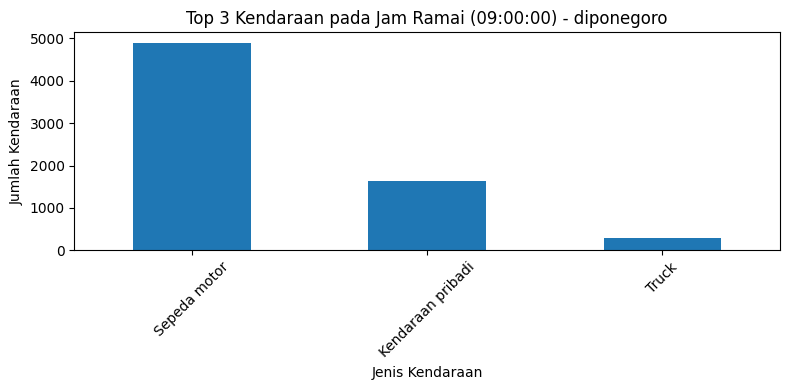

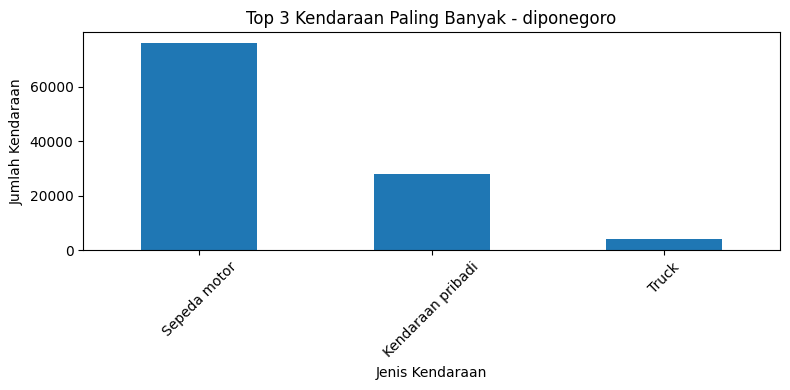


Analisis untuk imam bonjol:
- Jenis kendaraan paling sering lewat dalam sehari: Sepeda motor (36911 kendaraan)
- Jam ramai: 18:00:00
- Jenis kendaraan paling banyak pada jam ramai (18:00:00):
  1. Sepeda motor: 2489 kendaraan
  2. Kendaraan pribadi: 1195 kendaraan
  3. Truck: 75 kendaraan


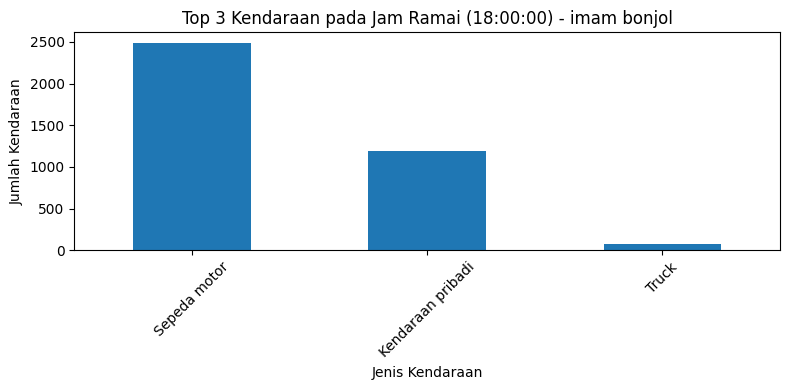

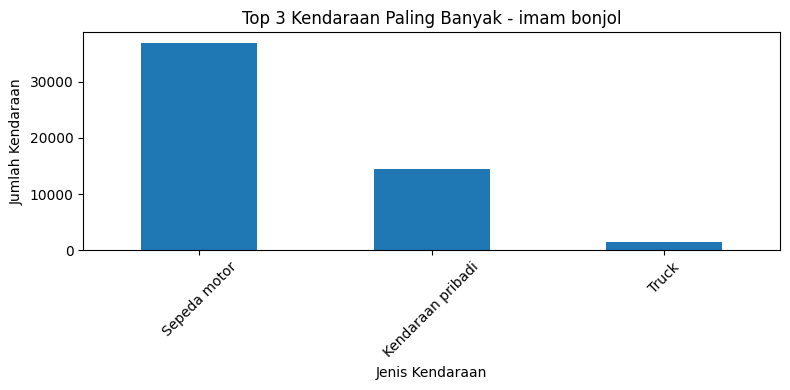


Analisis untuk a yani:
- Jenis kendaraan paling sering lewat dalam sehari: Sepeda motor (89135 kendaraan)
- Jam ramai: 16:00:00
- Jenis kendaraan paling banyak pada jam ramai (16:00:00):
  1. Sepeda motor: 7252 kendaraan
  2. Kendaraan pribadi: 2596 kendaraan
  3. Truck: 430 kendaraan


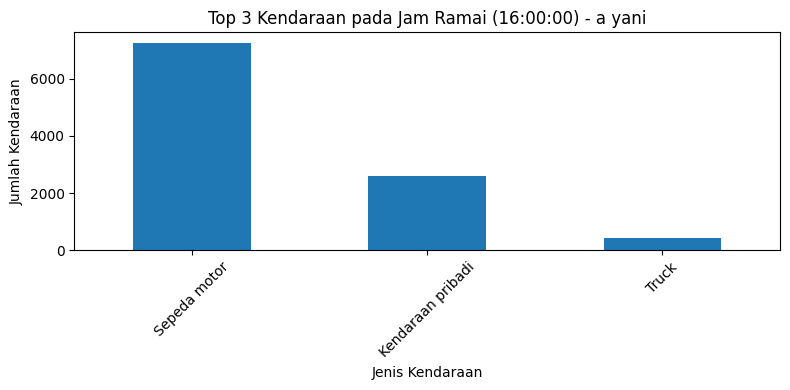

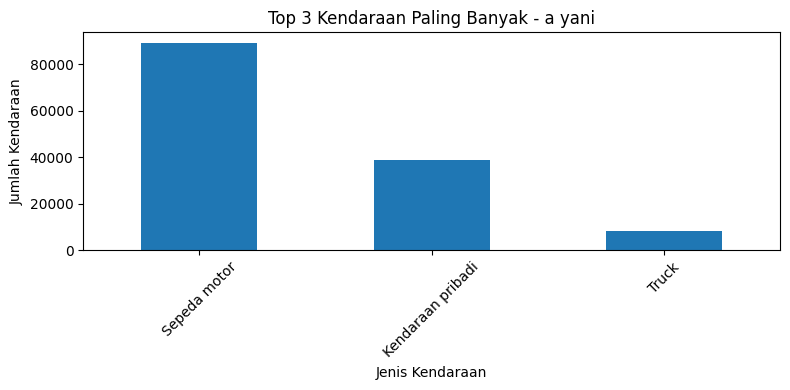


Analisis untuk gajah mada:
- Jenis kendaraan paling sering lewat dalam sehari: Sepeda motor (94312 kendaraan)
- Jam ramai: 16:00:00
- Jenis kendaraan paling banyak pada jam ramai (16:00:00):
  1. Sepeda motor: 6001 kendaraan
  2. Kendaraan pribadi: 3759 kendaraan
  3. Truck: 338 kendaraan


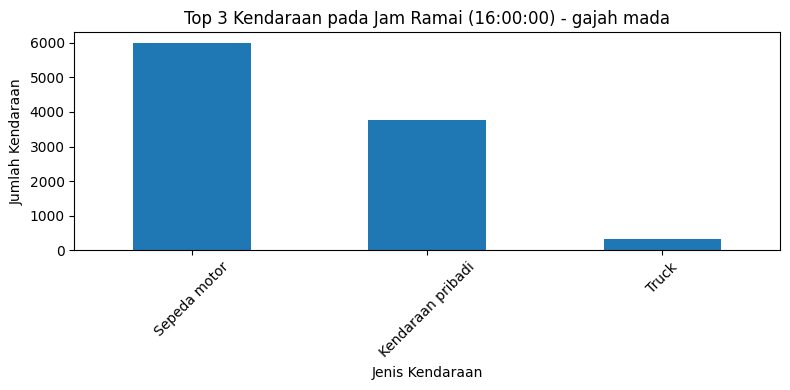

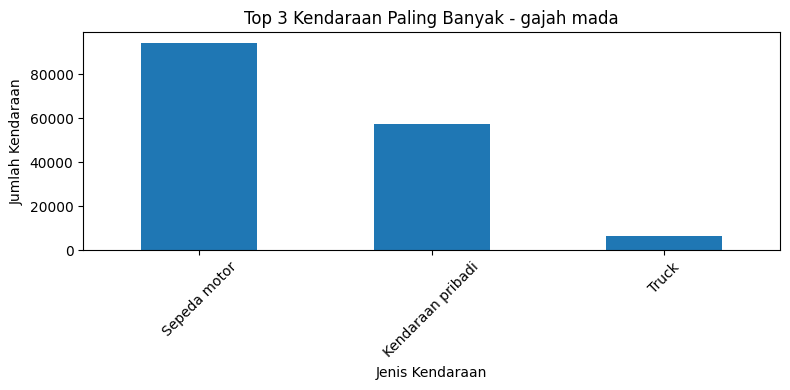


Analisis untuk sudirman:
- Jenis kendaraan paling sering lewat dalam sehari: Kendaraan pribadi (57286 kendaraan)
- Jam ramai: 13:00:00
- Jenis kendaraan paling banyak pada jam ramai (13:00:00):
  1. Kendaraan pribadi: 4299 kendaraan
  2. Truck: 1085 kendaraan
  3. Bus: 118 kendaraan


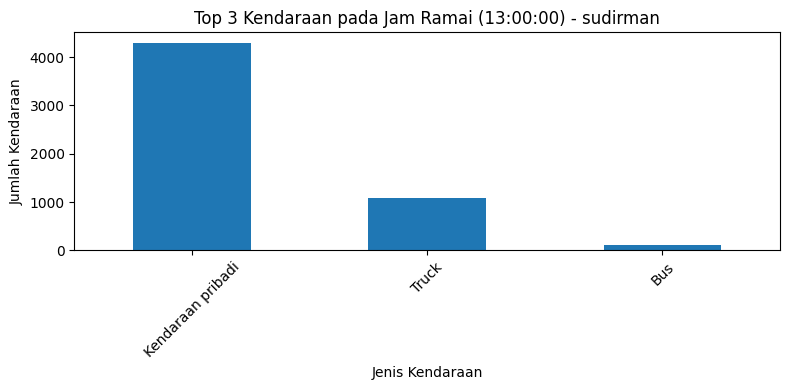

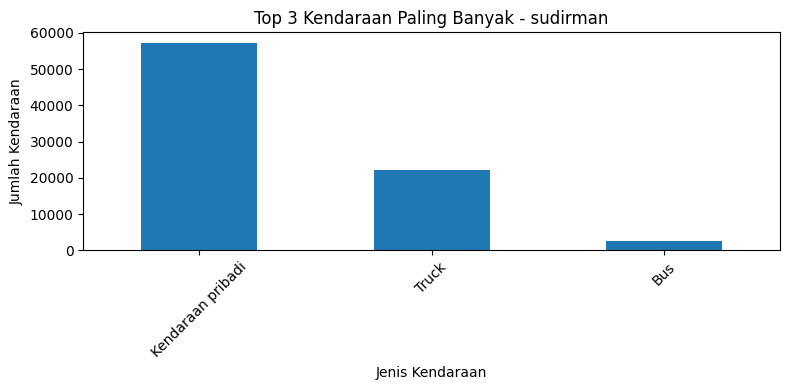


Analisis untuk brantas:
- Jenis kendaraan paling sering lewat dalam sehari: Sepeda motor (135751 kendaraan)
- Jam ramai: 16:00:00
- Jenis kendaraan paling banyak pada jam ramai (16:00:00):
  1. Sepeda motor: 8928 kendaraan
  2. Kendaraan pribadi: 3552 kendaraan
  3. Truck: 523 kendaraan


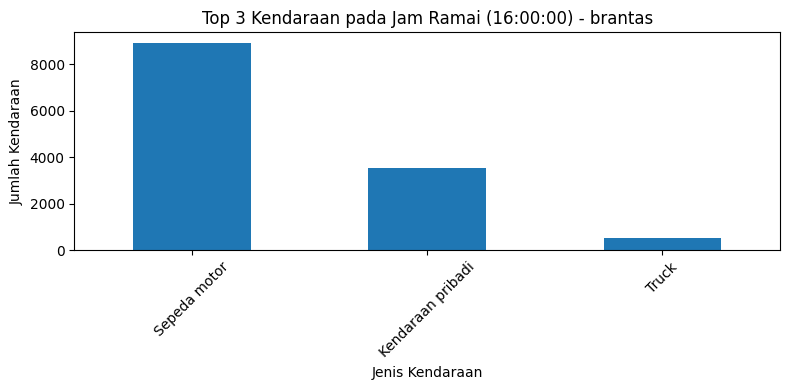

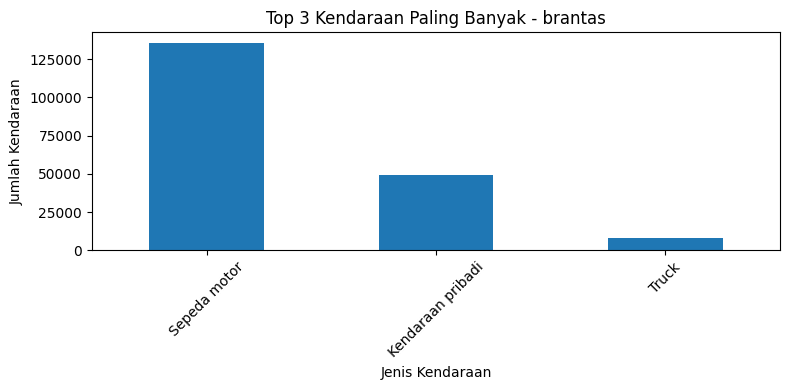


Analisis untuk patimura:
- Jenis kendaraan paling sering lewat dalam sehari: Sepeda motor (97102 kendaraan)
- Jam ramai: 07:00:00
- Jenis kendaraan paling banyak pada jam ramai (07:00:00):
  1. Sepeda motor: 8327 kendaraan
  2. Kendaraan pribadi: 1826 kendaraan
  3. Truck: 303 kendaraan


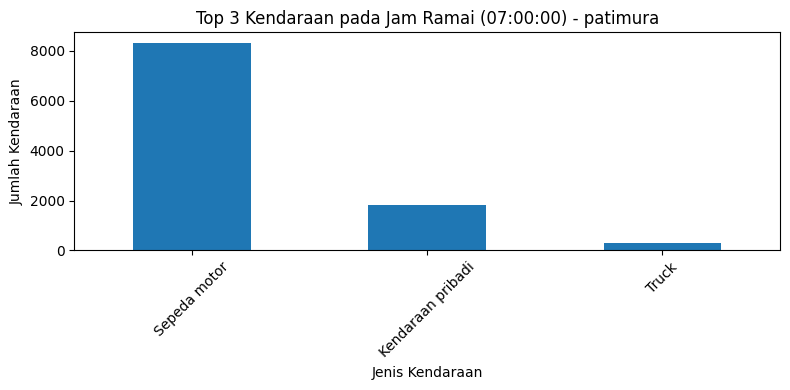

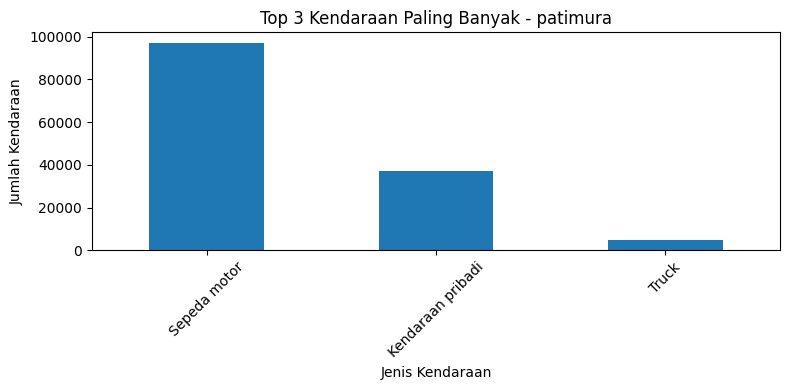


Analisis untuk trunojoyo:
- Jenis kendaraan paling sering lewat dalam sehari: Sepeda motor (99033 kendaraan)
- Jam ramai: 07:00:00
- Jenis kendaraan paling banyak pada jam ramai (07:00:00):
  1. Sepeda motor: 8864 kendaraan
  2. Kendaraan pribadi: 1790 kendaraan
  3. Truck: 670 kendaraan


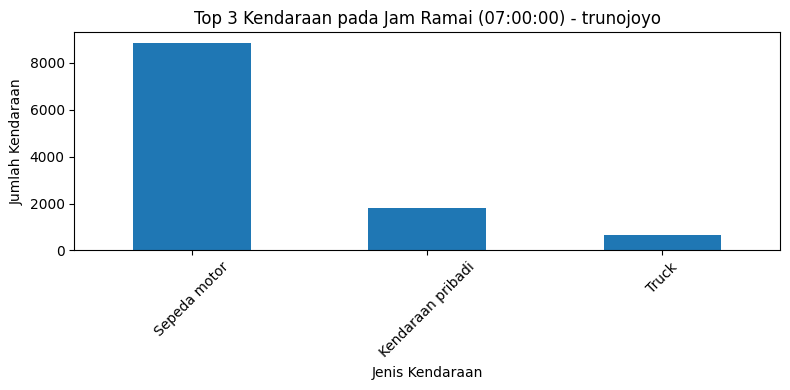

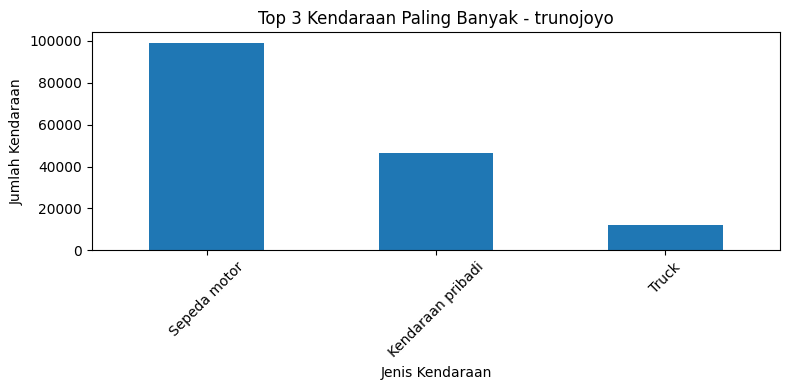


Analisis untuk arumdalu:
- Jenis kendaraan paling sering lewat dalam sehari: Sepeda motor (169042 kendaraan)
- Jam ramai: 16:00:00
- Jenis kendaraan paling banyak pada jam ramai (16:00:00):
  1. Sepeda motor: 11038 kendaraan
  2. Kendaraan pribadi: 3385 kendaraan
  3. Truck: 641 kendaraan


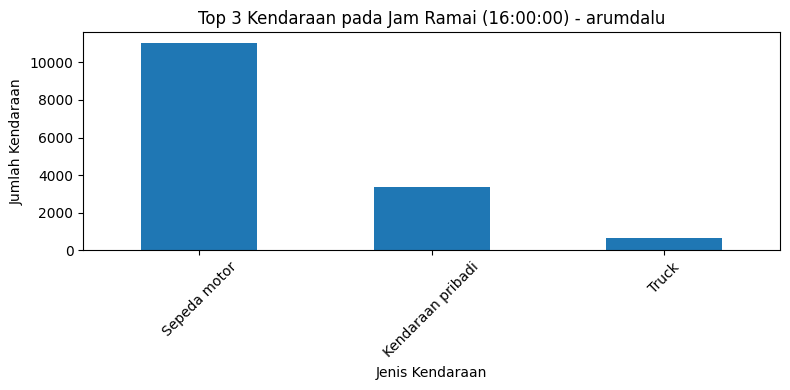

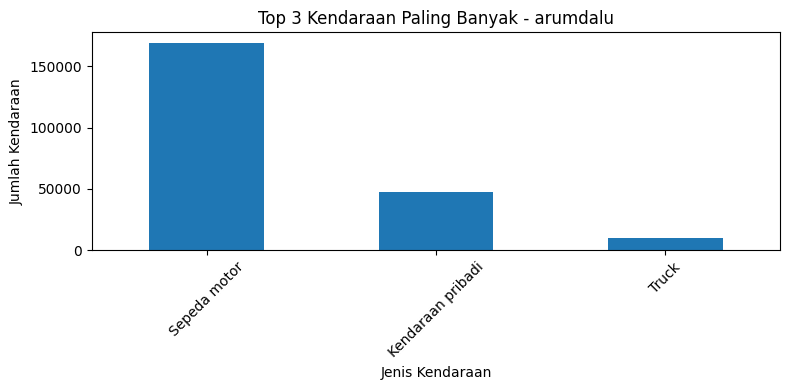


Analisis untuk mojorejo:
- Jenis kendaraan paling sering lewat dalam sehari: Sepeda motor (80813 kendaraan)
- Jam ramai: 09:00:00
- Jenis kendaraan paling banyak pada jam ramai (09:00:00):
  1. Sepeda motor: 5070 kendaraan
  2. Kendaraan pribadi: 2564 kendaraan
  3. Truck: 407 kendaraan


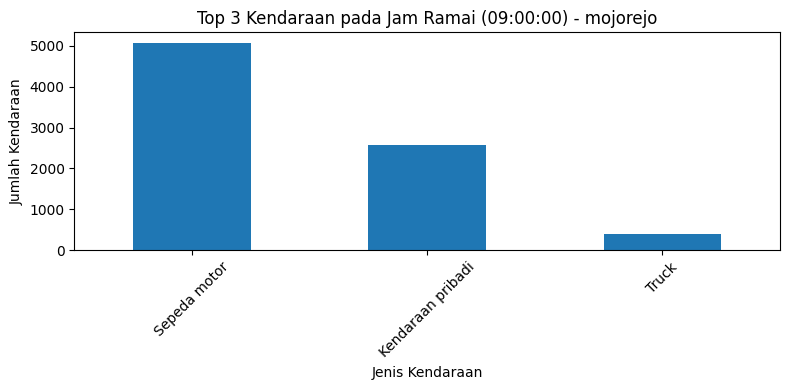

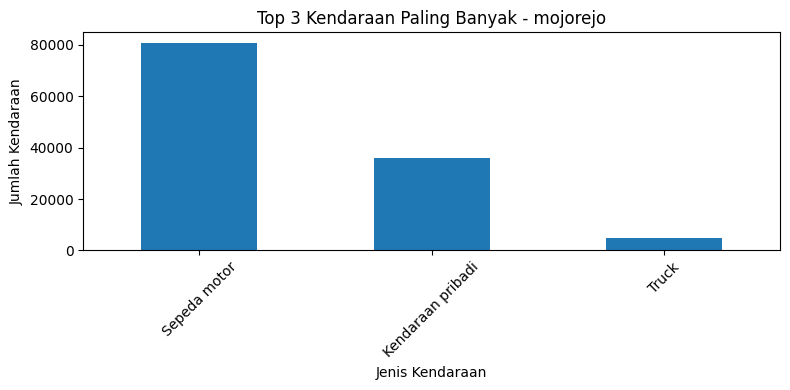

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df_mingguan = pd.read_excel("/content/drive/MyDrive/Dishub/dataset_final cleaning_23-29.xlsx")
df_mingguan_melted = df_mingguan.melt(
    id_vars=[ "Jenis Kendaraan", "Source", "Tanggal"],
    value_vars=[f"{i:02d}:00:00" for i in range(24)],
    var_name="Jam",
    value_name="Jumlah"
)

# Daftar sumber
sources = ["diponegoro", "imam bonjol", "a yani", "gajah mada", "sudirman", "brantas", "patimura", "trunojoyo", "arumdalu", "mojorejo"]

# Analisis per sumber
for source in sources:
    # Filter data per sumber
    df_source = df_mingguan_melted[df_mingguan_melted["Source"] == source]

    # 1. Jenis kendaraan paling sering lewat dalam sehari
    total_per_kendaraan = df_source.groupby("Jenis Kendaraan")["Jumlah"].sum().sort_values(ascending=False)
    kendaraan_paling_banyak = total_per_kendaraan.idxmax()
    jumlah_paling_banyak = total_per_kendaraan.max()

    # 2. Jam ramai dan jenis kendaraan yang banyak pada jam tersebut
    total_per_jam = df_source.groupby("Jam")["Jumlah"].sum().sort_values(ascending=False)
    jam_ramai = total_per_jam.idxmax()
    df_jam_ramai = df_source[df_source["Jam"] == jam_ramai]
    kendaraan_jam_ramai = df_jam_ramai.groupby("Jenis Kendaraan")["Jumlah"].sum().sort_values(ascending=False).head(3)

    # Tampilkan hasil
    print(f"\nAnalisis untuk {source}:")
    print(f"- Jenis kendaraan paling sering lewat dalam sehari: {kendaraan_paling_banyak} ({jumlah_paling_banyak} kendaraan)")
    print(f"- Jam ramai: {jam_ramai}")
    print(f"- Jenis kendaraan paling banyak pada jam ramai ({jam_ramai}):")
    for idx, (kendaraan, jumlah) in enumerate(kendaraan_jam_ramai.items(), 1):
        print(f"  {idx}. {kendaraan}: {jumlah} kendaraan")

    # Visualisasi sederhana per sumber
    plt.figure(figsize=(8, 4))
    kendaraan_jam_ramai.plot(kind="bar")
    plt.title(f"Top 3 Kendaraan pada Jam Ramai ({jam_ramai}) - {source}")
    plt.xlabel("Jenis Kendaraan")
    plt.ylabel("Jumlah Kendaraan")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 4))
    total_per_kendaraan.head(3).plot(kind="bar")
    plt.title(f"Top 3 Kendaraan Paling Banyak - {source}")
    plt.xlabel("Jenis Kendaraan")
    plt.ylabel("Jumlah Kendaraan")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# encodding

checkpoint dijadikan angka (kebalikannya)

In [ ]:
import pandas as pd


df = pd.read_excel("/content/drive/MyDrive/Dishub/dataset_bersih_mingguan_23-29.xlsx")


source_mapping = {
    "diponegoro": 1,
    "imam bonjol": 2,
    "a yani": 3,
    "gajah mada": 4,
    "sudirman": 5,
    "brantas": 6,
    "patimura": 7,
    "trunojoyo": 8,
    "arumdalu": 9,
    "mojorejo": 10
}


df["Tanggal"] = df["Tanggal"].str[:2].astype(int)

# Terapkan label encoding ke kolom Source
df["Source"] = df["Source"].map(source_mapping)

# Tampilkan 5 baris pertama untuk verifikasi
print("5 baris pertama setelah encoding:")
display(df.head())

# Simpan dataset yang sudah diencode
df.to_excel("/content/drive/MyDrive/Dishub/dataset_encoded (Source dan Tanggal)_23-29_juni.xlsx", index=False)

5 baris pertama setelah encoding:


,No.,Jenis Kendaraan,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Source,Tanggal
0,3,Truck,26,18,25,16,13,17,9,10,...,49,39,30,36,20,14,10,13,1,23
1,4,Two Wheeler,212,137,151,132,131,329,245,452,...,1096,809,684,708,547,426,361,261,1,23
2,7,Sedan,24,16,8,5,2,14,13,18,...,115,69,54,51,50,26,41,18,1,23
3,15,Large-Sized Coach,1,1,1,2,2,7,1,3,...,15,11,6,7,2,1,2,0,1,23
4,20,Minivan,13,20,12,12,14,11,4,8,...,50,44,31,30,24,14,19,7,1,23


# g dipake

## 23 Senin

integrated (gabungan) dari 10 titik perhari

In [ ]:
import pandas as pd

dfs1 = pd.read_excel("/content/tanggal 23 juni.xlsx", sheet_name=None)


mapping1 = {
    "1. 23 juni": "diponegoro",
    "2. 23 juni": "imam bonjol",
    "3. 23 juni": "a yani",
    "4. 23 juni": "gajah mada",
    "5. 23 juni": "sudirman",
    "6. 23 juni": "brantas",
    "7. 23 juni": "patimura",
    "8. 23 juni": "trunojoyo",
    "9. 23 juni": "arumdalu",
    "10. 23 juni": "mojorejo"
}


df_list1 = []

for sheet_name, df in dfs1.items():
    if sheet_name in mapping1:
        df["Source"] = mapping1[sheet_name]
        df_list1.append(df)
    else:
        print(f"Sheet '{sheet_name}' diabaikan")


df_final1 = pd.concat(df_list1, ignore_index=True)


display(df_final1.head())
print(df_final1["Source"].unique())

Sheet 'rekap keseluruhan 23 juni' diabaikan


,No.,Jenis Kendaraan,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Source
0,1,Bus,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro
1,2,Others,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro
2,3,Truck,26,18,25,16,13,17,9,10,...,35,49,39,30,36,20,14,10,13,diponegoro
3,4,Two Wheeler,212,137,151,132,131,329,245,452,...,774,1096,809,684,708,547,426,361,261,diponegoro
4,5,Oil Tank Truck,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro


['diponegoro' 'imam bonjol' 'a yani' 'gajah mada' 'sudirman' 'brantas'
 'patimura' 'trunojoyo' 'arumdalu' 'mojorejo']


In [ ]:
display(df_final1)

,No.,Jenis Kendaraan,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Source
0,1,Bus,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro
1,2,Others,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro
2,3,Truck,26,18,25,16,13,17,9,10,...,35,49,39,30,36,20,14,10,13,diponegoro
3,4,Two Wheeler,212,137,151,132,131,329,245,452,...,774,1096,809,684,708,547,426,361,261,diponegoro
4,5,Oil Tank Truck,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,30,Large-Sized Vehicle,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mojorejo
336,31,Pedestrian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mojorejo
337,32,Container Truck,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mojorejo
338,33,Minibus,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mojorejo


In [ ]:
df_final1.to_excel("gabungan_23_juni.xlsx", index=False)  #untuk nyimpen


ngilangin yg 0

In [ ]:
import pandas as pd

df1 = pd.read_excel("/content/gabungan_23_juni.xlsx")


print(df1.columns.tolist())


['No.', 'Jenis Kendaraan', '00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00', 'Source']


In [ ]:
import pandas as pd

jam_cols1 = [col for col in df1.columns if ":" in col]
print(jam_cols1)

['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00']


In [ ]:
#  baris mana yang semua jam = 0 yg artinya tidak ada isine atau gaada yg lewat atau terdetect
mask1 = (df1[jam_cols1] == 0).all(axis=1)


df_semua_jam_01 = df1[mask1]

print(f"Jumlah baris yang semua jamnya 0: {len(df_semua_jam_01)}")
display(df_semua_jam_01[["Jenis Kendaraan", "Source"]])  # Tampilkan jenis kendaraannya dan source nya

Jumlah baris yang semua jamnya 0: 244


,Jenis Kendaraan,Source
0,Bus,diponegoro
1,Others,diponegoro
4,Oil Tank Truck,diponegoro
5,Concrete Mixer,diponegoro
7,Sub-Compact Car,diponegoro
...,...,...
334,Saloon,mojorejo
335,Large-Sized Vehicle,mojorejo
336,Pedestrian,mojorejo
337,Container Truck,mojorejo


In [ ]:
# jenis kendaraan apa aja yg 0 dan dari mna
grouped1 = df_semua_jam_01.groupby("Source")["Jenis Kendaraan"].apply(list).reset_index()

display(grouped1)

for _, row in grouped1.iterrows():
    print(f"Source: {row['Source']}")
    print(f"Jenis Kendaraan 0 semua: {row['Jenis Kendaraan']}")
    print("-" * 40)

,Source,Jenis Kendaraan
0,a yani,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
1,arumdalu,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
2,brantas,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
3,diponegoro,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
4,gajah mada,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
5,imam bonjol,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
6,mojorejo,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
7,patimura,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
8,sudirman,"[Bus, Others, Two Wheeler, Oil Tank Truck, Con..."
9,trunojoyo,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."


Source: a yani
Jenis Kendaraan 0 semua: ['Bus', 'Others', 'Oil Tank Truck', 'Concrete Mixer', 'Sub-Compact Car', 'Unknown', 'Motorcycle', 'Motor Vehicle', 'Compact Car', 'Minitruck, Dropside Trailer', 'Sports Sedan', 'Light Truck', 'Small-Sized Vehicle', 'Flatbed Trailer', 'Crane, Engineering Vehicle', 'Non-Motor Vehicle', 'Medium and Heavy Truck', 'Hatchback', 'Dump Truck', 'Middle-Sized Bus', 'Saloon', 'Large-Sized Vehicle', 'Container Truck', 'Minibus']
----------------------------------------
Source: arumdalu
Jenis Kendaraan 0 semua: ['Bus', 'Others', 'Oil Tank Truck', 'Concrete Mixer', 'Sub-Compact Car', 'Unknown', 'Motorcycle', 'Motor Vehicle', 'Compact Car', 'Minitruck, Dropside Trailer', 'Sports Sedan', 'Light Truck', 'Small-Sized Vehicle', 'Flatbed Trailer', 'Crane, Engineering Vehicle', 'Non-Motor Vehicle', 'Medium and Heavy Truck', 'Hatchback', 'Dump Truck', 'Middle-Sized Bus', 'Saloon', 'Large-Sized Vehicle', 'Container Truck', 'Minibus']
-----------------------------------

In [ ]:
# Kondisi: baris dengan semua jam = 0
mask_semua_01 = (df1[jam_cols1] == 0).all(axis=1)

# Balikkan: baris dengan minimal 1 jam > 0
mask_ada_angka1 = ~mask_semua_01

# Ambil baris yang ada angkanya
df_ada_angka1 = df1[mask_ada_angka1]

print(f"Jumlah baris dengan minimal 1 jam > 0: {len(df_ada_angka1)}")
display(df_ada_angka1[["Jenis Kendaraan", "Source"]])


Jumlah baris dengan minimal 1 jam > 0: 96


,Jenis Kendaraan,Source
2,Truck,diponegoro
3,Two Wheeler,diponegoro
6,Sedan,diponegoro
14,Large-Sized Coach,diponegoro
19,Minivan,diponegoro
...,...,...
325,Minivan,mojorejo
327,SUV/MPV,mojorejo
329,Pick-up Truck,mojorejo
331,Tricycle,mojorejo


In [ ]:
grouped_ada_angka1 = df_ada_angka1.groupby("Source")["Jenis Kendaraan"].apply(list).reset_index()

print(grouped_ada_angka1)

# Kalau mau rapi per baris
grouped_ada_angka_explode1 = grouped_ada_angka1.explode("Jenis Kendaraan").reset_index(drop=True)
print(grouped_ada_angka_explode1)


        Source                                    Jenis Kendaraan
0       a yani  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
1     arumdalu  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
2      brantas  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
3   diponegoro  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
4   gajah mada  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
5  imam bonjol  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
6     mojorejo  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
7     patimura  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
8     sudirman  [Truck, Sedan, Large-Sized Coach, Minivan, SUV...
9    trunojoyo  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
       Source    Jenis Kendaraan
0      a yani              Truck
1      a yani        Two Wheeler
2      a yani              Sedan
3      a yani  Large-Sized Coach
4      a yani            Minivan
..        ...                ...
91  trunojoyo            SUV/MPV
92  trunoj

In [ ]:
grouped_ada_angka1.to_excel("ringkasan_kendaraan_ada_angka_per_source.xlsx", index=False)
grouped_ada_angka_explode1.to_excel("ringkasan_kendaraan_ada_angka_per_source_long.xlsx", index=False)

simpan

In [ ]:
mask_semua_01 = (df1[jam_cols1] == 0).all(axis=1)


In [ ]:
# Keep hanya baris yang TIDAK semua jam 0
df_hanya_ada_angka1 = df1[~mask_semua_01]

print(f"Jumlah baris yang tersisa (ada angkanya): {len(df_hanya_ada_angka1)}")


Jumlah baris yang tersisa (ada angkanya): 96


In [ ]:
df_hanya_ada_angka1.to_excel("dataset_bersih_23juni.xlsx", index=False)

## 24 Selasa  done

integrated (gabungan) dari 10 titik perhari

In [ ]:
import pandas as pd

dfs2 = pd.read_excel("/content/tanggal 24 juni.xlsx", sheet_name=None)


mapping2 = {
    "1. 24 juni": "diponegoro",
    "2. 24 juni": "imam bonjol",
    "3. 24 juni": "a yani",
    "4. 24 juni": "gajah mada",
    "5. 24 juni": "sudirman",
    "6. 24 juni": "brantas",
    "7. 24 juni": "patimura",
    "8. 24 juni": "trunojoyo",
    "9. 24 juni": "arumdalu",
    "10. 24 juni": "mojorejo"
}


df_list2 = []

for sheet_name, df in dfs2.items():
    if sheet_name in mapping2:
        df["Source"] = mapping2[sheet_name]
        df_list2.append(df)
    else:
        print(f"Sheet '{sheet_name}' diabaikan")


df_final2 = pd.concat(df_list2, ignore_index=True)


display(df_final2.head())
print(df_final2["Source"].unique())

Sheet 'rekap tgl 24' diabaikan


,No.,Jenis Kendaraan,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Source
0,1,Bus,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro
1,2,Others,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro
2,3,Truck,14,5,14,12,10,16,18,10,...,44,26,16,24,11,17,9,11,14,diponegoro
3,4,Two Wheeler,144,53,69,92,97,237,531,484,...,712,633,459,577,419,313,244,172,280,diponegoro
4,5,Oil Tank Truck,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro


['diponegoro' 'imam bonjol' 'a yani' 'gajah mada' 'brantas' 'patimura'
 'trunojoyo' 'arumdalu' 'mojorejo']


In [ ]:
display(df_final2)

,No.,Jenis Kendaraan,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Source
0,1,Bus,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro
1,2,Others,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro
2,3,Truck,26,18,25,16,13,17,9,10,...,35,49,39,30,36,20,14,10,13,diponegoro
3,4,Two Wheeler,212,137,151,132,131,329,245,452,...,774,1096,809,684,708,547,426,361,261,diponegoro
4,5,Oil Tank Truck,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,30,Large-Sized Vehicle,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mojorejo
336,31,Pedestrian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mojorejo
337,32,Container Truck,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mojorejo
338,33,Minibus,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mojorejo


In [ ]:
df_final2.to_excel("gabungan_24_juni.xlsx", index=False)  #untuk nyimpen


ngilangin yg 0

In [ ]:
import pandas as pd

df2 = pd.read_excel("/content/gabungan_24_juni.xlsx")


print(df2.columns.tolist())


['No.', 'Jenis Kendaraan', '00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00', 'Source']


In [ ]:
import pandas as pd

jam_cols2 = [col for col in df2.columns if ":" in col]
print(jam_cols2)

['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00']


In [ ]:
#  baris mana yang semua jam = 0 yg artinya tidak ada isine atau gaada yg lewat atau terdetect
mask2 = (df2[jam_cols2] == 0).all(axis=1)


df_semua_jam_02 = df2[mask2]

print(f"Jumlah baris yang semua jamnya 0: {len(df_semua_jam_02)}")
display(df_semua_jam_02[["Jenis Kendaraan", "Source"]])  # Tampilkan jenis kendaraannya dan source nya

Jumlah baris yang semua jamnya 0: 216


,Jenis Kendaraan,Source
0,Bus,diponegoro
1,Others,diponegoro
4,Oil Tank Truck,diponegoro
5,Concrete Mixer,diponegoro
7,Sub-Compact Car,diponegoro
...,...,...
300,Saloon,mojorejo
301,Large-Sized Vehicle,mojorejo
302,Pedestrian,mojorejo
303,Container Truck,mojorejo


In [ ]:
# jenis kendaraan apa aja yg 0 dan dari mna
grouped2 = df_semua_jam_02.groupby("Source")["Jenis Kendaraan"].apply(list).reset_index()

display(grouped2)

for _, row in grouped2.iterrows():
    print(f"Source: {row['Source']}")
    print(f"Jenis Kendaraan 0 semua: {row['Jenis Kendaraan']}")
    print("-" * 40)

,Source,Jenis Kendaraan
0,a yani,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
1,arumdalu,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
2,brantas,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
3,diponegoro,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
4,gajah mada,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
5,imam bonjol,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
6,mojorejo,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
7,patimura,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
8,trunojoyo,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."


Source: a yani
Jenis Kendaraan 0 semua: ['Bus', 'Others', 'Oil Tank Truck', 'Concrete Mixer', 'Sub-Compact Car', 'Unknown', 'Motorcycle', 'Motor Vehicle', 'Compact Car', 'Minitruck, Dropside Trailer', 'Sports Sedan', 'Light Truck', 'Small-Sized Vehicle', 'Flatbed Trailer', 'Crane, Engineering Vehicle', 'Non-Motor Vehicle', 'Medium and Heavy Truck', 'Hatchback', 'Dump Truck', 'Middle-Sized Bus', 'Saloon', 'Large-Sized Vehicle', 'Container Truck', 'Minibus']
----------------------------------------
Source: arumdalu
Jenis Kendaraan 0 semua: ['Bus', 'Others', 'Oil Tank Truck', 'Concrete Mixer', 'Sub-Compact Car', 'Motorcycle', 'Motor Vehicle', 'Compact Car', 'Minitruck, Dropside Trailer', 'Sports Sedan', 'Light Truck', 'Small-Sized Vehicle', 'Flatbed Trailer', 'Crane, Engineering Vehicle', 'Non-Motor Vehicle', 'Medium and Heavy Truck', 'Hatchback', 'Dump Truck', 'Middle-Sized Bus', 'Saloon', 'Large-Sized Vehicle', 'Container Truck', 'Minibus']
----------------------------------------
Sourc

In [ ]:
# Kondisi: baris dengan semua jam = 0
mask_semua_02 = (df2[jam_cols2] == 0).all(axis=1)

# Balikkan: baris dengan minimal 1 jam > 0
mask_ada_angka2 = ~mask_semua_02

# Ambil baris yang ada angkanya
df_ada_angka2 = df2[mask_ada_angka2]

print(f"Jumlah baris dengan minimal 1 jam > 0: {len(df_ada_angka2)}")
display(df_ada_angka2[["Jenis Kendaraan", "Source"]])


Jumlah baris dengan minimal 1 jam > 0: 90


,Jenis Kendaraan,Source
2,Truck,diponegoro
3,Two Wheeler,diponegoro
6,Sedan,diponegoro
14,Large-Sized Coach,diponegoro
19,Minivan,diponegoro
...,...,...
291,Minivan,mojorejo
293,SUV/MPV,mojorejo
295,Pick-up Truck,mojorejo
297,Tricycle,mojorejo


In [ ]:
grouped_ada_angka2 = df_ada_angka2.groupby("Source")["Jenis Kendaraan"].apply(list).reset_index()

print(grouped_ada_angka2)

# Kalau mau rapi per baris
grouped_ada_angka_explode2 = grouped_ada_angka2.explode("Jenis Kendaraan").reset_index(drop=True)
print(grouped_ada_angka_explode2)


        Source                                    Jenis Kendaraan
0       a yani  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
1     arumdalu  [Truck, Two Wheeler, Sedan, Unknown, Large-Siz...
2      brantas  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
3   diponegoro  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
4   gajah mada  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
5  imam bonjol  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
6     mojorejo  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
7     patimura  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
8    trunojoyo  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
       Source    Jenis Kendaraan
0      a yani              Truck
1      a yani        Two Wheeler
2      a yani              Sedan
3      a yani  Large-Sized Coach
4      a yani            Minivan
..        ...                ...
85  trunojoyo            SUV/MPV
86  trunojoyo      Pick-up Truck
87  trunojoyo           Tricycle
88  trunoj

In [ ]:
grouped_ada_angka2.to_excel("ringkasan_kendaraan_ada_angka_per_source 2.xlsx", index=False)
grouped_ada_angka_explode2.to_excel("ringkasan_kendaraan_ada_angka_per_source_long. 2xlsx", index=False)

simpan

In [ ]:
mask_semua_02 = (df2[jam_cols2] == 0).all(axis=1)


In [ ]:
# Keep hanya baris yang TIDAK semua jam 0
df_hanya_ada_angka2 = df2[~mask_semua_02]

print(f"Jumlah baris yang tersisa (ada angkanya): {len(df_hanya_ada_angka2)}")


Jumlah baris yang tersisa (ada angkanya): 90


In [ ]:
df_hanya_ada_angka1.to_excel("dataset_bersih_24juni.xlsx", index=False)

## 25 Rabu

integrated (gabungan) dari 10 titik perhari

In [ ]:
import pandas as pd

dfs3 = pd.read_excel("/content/tanggal 25 juni.xlsx", sheet_name=None)


mapping3 = {
    "1. 25 juni": "diponegoro",
    "2. 25 juni": "imam bonjol",
    "3. 25 juni": "a yani",
    "4. 25 juni": "gajah mada",
    "5. 25 juni": "sudirman",
    "6. 25 juni": "brantas",
    "7. 25 juni": "patimura",
    "8. 25 juni": "trunojoyo",
    "9. 25 juni": "arumdalu",
    "10. 25 juni": "mojorejo"
}


df_list3 = []

for sheet_name, df in dfs3.items():
    if sheet_name in mapping3:
        df["Source"] = mapping3[sheet_name]
        df_list3.append(df)
    else:
        print(f"Sheet '{sheet_name}' diabaikan")


df_final3 = pd.concat(df_list3, ignore_index=True)


display(df_final3.head())
print(df_final3["Source"].unique())

Sheet 'rekap tgl 25' diabaikan


,No.,Jenis Kendaraan,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Source
0,1,Bus,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro
1,2,Others,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro
2,3,Truck,10,23,19,9,13,22,17,26,...,30,23,22,34,21,16,17,27,14,diponegoro
3,4,Two Wheeler,205,101,107,102,131,305,790,926,...,498,500,565,675,635,663,506,506,318,diponegoro
4,5,Oil Tank Truck,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro


['diponegoro' 'imam bonjol' 'a yani' 'gajah mada' 'sudirman' 'brantas'
 'patimura' 'trunojoyo' 'arumdalu' 'mojorejo']


In [ ]:
display(df_final3)

,No.,Jenis Kendaraan,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Source
0,1,Bus,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro
1,2,Others,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro
2,3,Truck,10,23,19,9,13,22,17,26,...,30,23,22,34,21,16,17,27,14,diponegoro
3,4,Two Wheeler,205,101,107,102,131,305,790,926,...,498,500,565,675,635,663,506,506,318,diponegoro
4,5,Oil Tank Truck,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,30,Large-Sized Vehicle,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mojorejo
336,31,Pedestrian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mojorejo
337,32,Container Truck,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mojorejo
338,33,Minibus,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mojorejo


In [ ]:
df_final3.to_excel("gabungan_25_juni.xlsx", index=False)  #untuk nyimpen


ngilangin yg 0

In [ ]:
import pandas as pd

df3 = pd.read_excel("/content/gabungan_25_juni.xlsx")


print(df3.columns.tolist())


['No.', 'Jenis Kendaraan', '00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00', 'Source']


In [ ]:
import pandas as pd

jam_cols3 = [col for col in df3.columns if ":" in col]
print(jam_cols3)

['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00']


In [ ]:
#  baris mana yang semua jam = 0 yg artinya tidak ada isine atau gaada yg lewat atau terdetect
mask3 = (df3[jam_cols3] == 0).all(axis=1)


df_semua_jam_03 = df3[mask3]

print(f"Jumlah baris yang semua jamnya 0: {len(df_semua_jam_03)}")
display(df_semua_jam_03[["Jenis Kendaraan", "Source"]])  # Tampilkan jenis kendaraannya dan source nya

Jumlah baris yang semua jamnya 0: 243


,Jenis Kendaraan,Source
0,Bus,diponegoro
1,Others,diponegoro
4,Oil Tank Truck,diponegoro
5,Concrete Mixer,diponegoro
7,Sub-Compact Car,diponegoro
...,...,...
334,Saloon,mojorejo
335,Large-Sized Vehicle,mojorejo
336,Pedestrian,mojorejo
337,Container Truck,mojorejo


In [ ]:
# jenis kendaraan apa aja yg 0 dan dari mna
grouped3 = df_semua_jam_03.groupby("Source")["Jenis Kendaraan"].apply(list).reset_index()

display(grouped3)

for _, row in grouped3.iterrows():
    print(f"Source: {row['Source']}")
    print(f"Jenis Kendaraan 0 semua: {row['Jenis Kendaraan']}")
    print("-" * 40)

,Source,Jenis Kendaraan
0,a yani,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
1,arumdalu,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
2,brantas,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
3,diponegoro,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
4,gajah mada,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
5,imam bonjol,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
6,mojorejo,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
7,patimura,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
8,sudirman,"[Bus, Others, Two Wheeler, Oil Tank Truck, Con..."
9,trunojoyo,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."


Source: a yani
Jenis Kendaraan 0 semua: ['Bus', 'Others', 'Oil Tank Truck', 'Concrete Mixer', 'Sub-Compact Car', 'Unknown', 'Motorcycle', 'Motor Vehicle', 'Compact Car', 'Minitruck, Dropside Trailer', 'Sports Sedan', 'Light Truck', 'Small-Sized Vehicle', 'Flatbed Trailer', 'Crane, Engineering Vehicle', 'Non-Motor Vehicle', 'Medium and Heavy Truck', 'Hatchback', 'Dump Truck', 'Middle-Sized Bus', 'Saloon', 'Large-Sized Vehicle', 'Container Truck', 'Minibus']
----------------------------------------
Source: arumdalu
Jenis Kendaraan 0 semua: ['Bus', 'Others', 'Oil Tank Truck', 'Concrete Mixer', 'Sub-Compact Car', 'Motorcycle', 'Motor Vehicle', 'Compact Car', 'Minitruck, Dropside Trailer', 'Sports Sedan', 'Light Truck', 'Small-Sized Vehicle', 'Flatbed Trailer', 'Crane, Engineering Vehicle', 'Non-Motor Vehicle', 'Medium and Heavy Truck', 'Hatchback', 'Dump Truck', 'Middle-Sized Bus', 'Saloon', 'Large-Sized Vehicle', 'Container Truck', 'Minibus']
----------------------------------------
Sourc

In [ ]:
# Kondisi: baris dengan semua jam = 0
mask_semua_03 = (df3[jam_cols3] == 0).all(axis=1)

# Balikkan: baris dengan minimal 1 jam > 0
mask_ada_angka3 = ~mask_semua_03

# Ambil baris yang ada angkanya
df_ada_angka3 = df3[mask_ada_angka3]

print(f"Jumlah baris dengan minimal 1 jam > 0: {len(df_ada_angka3)}")
display(df_ada_angka3[["Jenis Kendaraan", "Source"]])


Jumlah baris dengan minimal 1 jam > 0: 97


,Jenis Kendaraan,Source
2,Truck,diponegoro
3,Two Wheeler,diponegoro
6,Sedan,diponegoro
14,Large-Sized Coach,diponegoro
19,Minivan,diponegoro
...,...,...
325,Minivan,mojorejo
327,SUV/MPV,mojorejo
329,Pick-up Truck,mojorejo
331,Tricycle,mojorejo


In [ ]:
grouped_ada_angka3 = df_ada_angka3.groupby("Source")["Jenis Kendaraan"].apply(list).reset_index()

print(grouped_ada_angka3)

# Kalau mau rapi per baris
grouped_ada_angka_explode3 = grouped_ada_angka3.explode("Jenis Kendaraan").reset_index(drop=True)
print(grouped_ada_angka_explode3)


        Source                                    Jenis Kendaraan
0       a yani  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
1     arumdalu  [Truck, Two Wheeler, Sedan, Unknown, Large-Siz...
2      brantas  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
3   diponegoro  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
4   gajah mada  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
5  imam bonjol  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
6     mojorejo  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
7     patimura  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
8     sudirman  [Truck, Sedan, Large-Sized Coach, Minivan, SUV...
9    trunojoyo  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
       Source    Jenis Kendaraan
0      a yani              Truck
1      a yani        Two Wheeler
2      a yani              Sedan
3      a yani  Large-Sized Coach
4      a yani            Minivan
..        ...                ...
92  trunojoyo            SUV/MPV
93  trunoj

In [ ]:
grouped_ada_angka2.to_excel("ringkasan_kendaraan_ada_angka_per_source 2.xlsx", index=False)
grouped_ada_angka_explode2.to_excel("ringkasan_kendaraan_ada_angka_per_source_long. 2xlsx", index=False)

simpan

In [ ]:
mask_semua_02 = (df2[jam_cols2] == 0).all(axis=1)


In [ ]:
# Keep hanya baris yang TIDAK semua jam 0
df_hanya_ada_angka2 = df2[~mask_semua_02]

print(f"Jumlah baris yang tersisa (ada angkanya): {len(df_hanya_ada_angka2)}")


Jumlah baris yang tersisa (ada angkanya): 90


In [ ]:
df_hanya_ada_angka1.to_excel("dataset_bersih_24juni.xlsx", index=False)

## 26 Kamis

integrated (gabungan) dari 10 titik perhari

In [ ]:
import pandas as pd

dfs2 = pd.read_excel("/content/tanggal 24 juni.xlsx", sheet_name=None)


mapping2 = {
    "1. 24 juni": "diponegoro",
    "2. 24 juni": "imam bonjol",
    "3. 24 juni": "a yani",
    "4. 24 juni": "gajah mada",
    "5. 24 juni": "sudirman",
    "6. 24 juni": "brantas",
    "7. 24 juni": "patimura",
    "8. 24 juni": "trunojoyo",
    "9. 24 juni": "arumdalu",
    "10. 24 juni": "mojorejo"
}


df_list2 = []

for sheet_name, df in dfs2.items():
    if sheet_name in mapping2:
        df["Source"] = mapping2[sheet_name]
        df_list2.append(df)
    else:
        print(f"Sheet '{sheet_name}' diabaikan")


df_final2 = pd.concat(df_list2, ignore_index=True)


display(df_final2.head())
print(df_final2["Source"].unique())

Sheet 'rekap tgl 24' diabaikan


,No.,Jenis Kendaraan,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Source
0,1,Bus,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro
1,2,Others,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro
2,3,Truck,14,5,14,12,10,16,18,10,...,44,26,16,24,11,17,9,11,14,diponegoro
3,4,Two Wheeler,144,53,69,92,97,237,531,484,...,712,633,459,577,419,313,244,172,280,diponegoro
4,5,Oil Tank Truck,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro


['diponegoro' 'imam bonjol' 'a yani' 'gajah mada' 'brantas' 'patimura'
 'trunojoyo' 'arumdalu' 'mojorejo']


In [ ]:
display(df_final2)

,No.,Jenis Kendaraan,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Source
0,1,Bus,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro
1,2,Others,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro
2,3,Truck,26,18,25,16,13,17,9,10,...,35,49,39,30,36,20,14,10,13,diponegoro
3,4,Two Wheeler,212,137,151,132,131,329,245,452,...,774,1096,809,684,708,547,426,361,261,diponegoro
4,5,Oil Tank Truck,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,30,Large-Sized Vehicle,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mojorejo
336,31,Pedestrian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mojorejo
337,32,Container Truck,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mojorejo
338,33,Minibus,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mojorejo


In [ ]:
df_final2.to_excel("gabungan_24_juni.xlsx", index=False)  #untuk nyimpen


ngilangin yg 0

In [ ]:
import pandas as pd

df2 = pd.read_excel("/content/gabungan_24_juni.xlsx")


print(df2.columns.tolist())


['No.', 'Jenis Kendaraan', '00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00', 'Source']


In [ ]:
import pandas as pd

jam_cols2 = [col for col in df2.columns if ":" in col]
print(jam_cols2)

['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00']


In [ ]:
#  baris mana yang semua jam = 0 yg artinya tidak ada isine atau gaada yg lewat atau terdetect
mask2 = (df2[jam_cols2] == 0).all(axis=1)


df_semua_jam_02 = df2[mask2]

print(f"Jumlah baris yang semua jamnya 0: {len(df_semua_jam_02)}")
display(df_semua_jam_02[["Jenis Kendaraan", "Source"]])  # Tampilkan jenis kendaraannya dan source nya

Jumlah baris yang semua jamnya 0: 216


,Jenis Kendaraan,Source
0,Bus,diponegoro
1,Others,diponegoro
4,Oil Tank Truck,diponegoro
5,Concrete Mixer,diponegoro
7,Sub-Compact Car,diponegoro
...,...,...
300,Saloon,mojorejo
301,Large-Sized Vehicle,mojorejo
302,Pedestrian,mojorejo
303,Container Truck,mojorejo


In [ ]:
# jenis kendaraan apa aja yg 0 dan dari mna
grouped2 = df_semua_jam_02.groupby("Source")["Jenis Kendaraan"].apply(list).reset_index()

display(grouped2)

for _, row in grouped2.iterrows():
    print(f"Source: {row['Source']}")
    print(f"Jenis Kendaraan 0 semua: {row['Jenis Kendaraan']}")
    print("-" * 40)

,Source,Jenis Kendaraan
0,a yani,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
1,arumdalu,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
2,brantas,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
3,diponegoro,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
4,gajah mada,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
5,imam bonjol,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
6,mojorejo,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
7,patimura,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
8,trunojoyo,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."


Source: a yani
Jenis Kendaraan 0 semua: ['Bus', 'Others', 'Oil Tank Truck', 'Concrete Mixer', 'Sub-Compact Car', 'Unknown', 'Motorcycle', 'Motor Vehicle', 'Compact Car', 'Minitruck, Dropside Trailer', 'Sports Sedan', 'Light Truck', 'Small-Sized Vehicle', 'Flatbed Trailer', 'Crane, Engineering Vehicle', 'Non-Motor Vehicle', 'Medium and Heavy Truck', 'Hatchback', 'Dump Truck', 'Middle-Sized Bus', 'Saloon', 'Large-Sized Vehicle', 'Container Truck', 'Minibus']
----------------------------------------
Source: arumdalu
Jenis Kendaraan 0 semua: ['Bus', 'Others', 'Oil Tank Truck', 'Concrete Mixer', 'Sub-Compact Car', 'Motorcycle', 'Motor Vehicle', 'Compact Car', 'Minitruck, Dropside Trailer', 'Sports Sedan', 'Light Truck', 'Small-Sized Vehicle', 'Flatbed Trailer', 'Crane, Engineering Vehicle', 'Non-Motor Vehicle', 'Medium and Heavy Truck', 'Hatchback', 'Dump Truck', 'Middle-Sized Bus', 'Saloon', 'Large-Sized Vehicle', 'Container Truck', 'Minibus']
----------------------------------------
Sourc

In [ ]:
# Kondisi: baris dengan semua jam = 0
mask_semua_02 = (df2[jam_cols2] == 0).all(axis=1)

# Balikkan: baris dengan minimal 1 jam > 0
mask_ada_angka2 = ~mask_semua_02

# Ambil baris yang ada angkanya
df_ada_angka2 = df2[mask_ada_angka2]

print(f"Jumlah baris dengan minimal 1 jam > 0: {len(df_ada_angka2)}")
display(df_ada_angka2[["Jenis Kendaraan", "Source"]])


Jumlah baris dengan minimal 1 jam > 0: 90


,Jenis Kendaraan,Source
2,Truck,diponegoro
3,Two Wheeler,diponegoro
6,Sedan,diponegoro
14,Large-Sized Coach,diponegoro
19,Minivan,diponegoro
...,...,...
291,Minivan,mojorejo
293,SUV/MPV,mojorejo
295,Pick-up Truck,mojorejo
297,Tricycle,mojorejo


In [ ]:
grouped_ada_angka2 = df_ada_angka2.groupby("Source")["Jenis Kendaraan"].apply(list).reset_index()

print(grouped_ada_angka2)

# Kalau mau rapi per baris
grouped_ada_angka_explode2 = grouped_ada_angka2.explode("Jenis Kendaraan").reset_index(drop=True)
print(grouped_ada_angka_explode2)


        Source                                    Jenis Kendaraan
0       a yani  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
1     arumdalu  [Truck, Two Wheeler, Sedan, Unknown, Large-Siz...
2      brantas  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
3   diponegoro  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
4   gajah mada  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
5  imam bonjol  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
6     mojorejo  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
7     patimura  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
8    trunojoyo  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
       Source    Jenis Kendaraan
0      a yani              Truck
1      a yani        Two Wheeler
2      a yani              Sedan
3      a yani  Large-Sized Coach
4      a yani            Minivan
..        ...                ...
85  trunojoyo            SUV/MPV
86  trunojoyo      Pick-up Truck
87  trunojoyo           Tricycle
88  trunoj

In [ ]:
grouped_ada_angka2.to_excel("ringkasan_kendaraan_ada_angka_per_source 2.xlsx", index=False)
grouped_ada_angka_explode2.to_excel("ringkasan_kendaraan_ada_angka_per_source_long. 2xlsx", index=False)

simpan

In [ ]:
mask_semua_02 = (df2[jam_cols2] == 0).all(axis=1)


In [ ]:
# Keep hanya baris yang TIDAK semua jam 0
df_hanya_ada_angka2 = df2[~mask_semua_02]

print(f"Jumlah baris yang tersisa (ada angkanya): {len(df_hanya_ada_angka2)}")


Jumlah baris yang tersisa (ada angkanya): 90


In [ ]:
df_hanya_ada_angka1.to_excel("dataset_bersih_24juni.xlsx", index=False)

## 27 Kamis

integrated (gabungan) dari 10 titik perhari

In [ ]:
import pandas as pd

dfs2 = pd.read_excel("/content/tanggal 24 juni.xlsx", sheet_name=None)


mapping2 = {
    "1. 24 juni": "diponegoro",
    "2. 24 juni": "imam bonjol",
    "3. 24 juni": "a yani",
    "4. 24 juni": "gajah mada",
    "5. 24 juni": "sudirman",
    "6. 24 juni": "brantas",
    "7. 24 juni": "patimura",
    "8. 24 juni": "trunojoyo",
    "9. 24 juni": "arumdalu",
    "10. 24 juni": "mojorejo"
}


df_list2 = []

for sheet_name, df in dfs2.items():
    if sheet_name in mapping2:
        df["Source"] = mapping2[sheet_name]
        df_list2.append(df)
    else:
        print(f"Sheet '{sheet_name}' diabaikan")


df_final2 = pd.concat(df_list2, ignore_index=True)


display(df_final2.head())
print(df_final2["Source"].unique())

Sheet 'rekap tgl 24' diabaikan


,No.,Jenis Kendaraan,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Source
0,1,Bus,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro
1,2,Others,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro
2,3,Truck,14,5,14,12,10,16,18,10,...,44,26,16,24,11,17,9,11,14,diponegoro
3,4,Two Wheeler,144,53,69,92,97,237,531,484,...,712,633,459,577,419,313,244,172,280,diponegoro
4,5,Oil Tank Truck,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro


['diponegoro' 'imam bonjol' 'a yani' 'gajah mada' 'brantas' 'patimura'
 'trunojoyo' 'arumdalu' 'mojorejo']


In [ ]:
display(df_final2)

,No.,Jenis Kendaraan,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Source
0,1,Bus,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro
1,2,Others,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro
2,3,Truck,26,18,25,16,13,17,9,10,...,35,49,39,30,36,20,14,10,13,diponegoro
3,4,Two Wheeler,212,137,151,132,131,329,245,452,...,774,1096,809,684,708,547,426,361,261,diponegoro
4,5,Oil Tank Truck,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,30,Large-Sized Vehicle,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mojorejo
336,31,Pedestrian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mojorejo
337,32,Container Truck,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mojorejo
338,33,Minibus,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mojorejo


In [ ]:
df_final2.to_excel("gabungan_24_juni.xlsx", index=False)  #untuk nyimpen


ngilangin yg 0

In [ ]:
import pandas as pd

df2 = pd.read_excel("/content/gabungan_24_juni.xlsx")


print(df2.columns.tolist())


['No.', 'Jenis Kendaraan', '00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00', 'Source']


In [ ]:
import pandas as pd

jam_cols2 = [col for col in df2.columns if ":" in col]
print(jam_cols2)

['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00']


In [ ]:
#  baris mana yang semua jam = 0 yg artinya tidak ada isine atau gaada yg lewat atau terdetect
mask2 = (df2[jam_cols2] == 0).all(axis=1)


df_semua_jam_02 = df2[mask2]

print(f"Jumlah baris yang semua jamnya 0: {len(df_semua_jam_02)}")
display(df_semua_jam_02[["Jenis Kendaraan", "Source"]])  # Tampilkan jenis kendaraannya dan source nya

Jumlah baris yang semua jamnya 0: 216


,Jenis Kendaraan,Source
0,Bus,diponegoro
1,Others,diponegoro
4,Oil Tank Truck,diponegoro
5,Concrete Mixer,diponegoro
7,Sub-Compact Car,diponegoro
...,...,...
300,Saloon,mojorejo
301,Large-Sized Vehicle,mojorejo
302,Pedestrian,mojorejo
303,Container Truck,mojorejo


In [ ]:
# jenis kendaraan apa aja yg 0 dan dari mna
grouped2 = df_semua_jam_02.groupby("Source")["Jenis Kendaraan"].apply(list).reset_index()

display(grouped2)

for _, row in grouped2.iterrows():
    print(f"Source: {row['Source']}")
    print(f"Jenis Kendaraan 0 semua: {row['Jenis Kendaraan']}")
    print("-" * 40)

,Source,Jenis Kendaraan
0,a yani,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
1,arumdalu,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
2,brantas,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
3,diponegoro,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
4,gajah mada,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
5,imam bonjol,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
6,mojorejo,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
7,patimura,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
8,trunojoyo,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."


Source: a yani
Jenis Kendaraan 0 semua: ['Bus', 'Others', 'Oil Tank Truck', 'Concrete Mixer', 'Sub-Compact Car', 'Unknown', 'Motorcycle', 'Motor Vehicle', 'Compact Car', 'Minitruck, Dropside Trailer', 'Sports Sedan', 'Light Truck', 'Small-Sized Vehicle', 'Flatbed Trailer', 'Crane, Engineering Vehicle', 'Non-Motor Vehicle', 'Medium and Heavy Truck', 'Hatchback', 'Dump Truck', 'Middle-Sized Bus', 'Saloon', 'Large-Sized Vehicle', 'Container Truck', 'Minibus']
----------------------------------------
Source: arumdalu
Jenis Kendaraan 0 semua: ['Bus', 'Others', 'Oil Tank Truck', 'Concrete Mixer', 'Sub-Compact Car', 'Motorcycle', 'Motor Vehicle', 'Compact Car', 'Minitruck, Dropside Trailer', 'Sports Sedan', 'Light Truck', 'Small-Sized Vehicle', 'Flatbed Trailer', 'Crane, Engineering Vehicle', 'Non-Motor Vehicle', 'Medium and Heavy Truck', 'Hatchback', 'Dump Truck', 'Middle-Sized Bus', 'Saloon', 'Large-Sized Vehicle', 'Container Truck', 'Minibus']
----------------------------------------
Sourc

In [ ]:
# Kondisi: baris dengan semua jam = 0
mask_semua_02 = (df2[jam_cols2] == 0).all(axis=1)

# Balikkan: baris dengan minimal 1 jam > 0
mask_ada_angka2 = ~mask_semua_02

# Ambil baris yang ada angkanya
df_ada_angka2 = df2[mask_ada_angka2]

print(f"Jumlah baris dengan minimal 1 jam > 0: {len(df_ada_angka2)}")
display(df_ada_angka2[["Jenis Kendaraan", "Source"]])


Jumlah baris dengan minimal 1 jam > 0: 90


,Jenis Kendaraan,Source
2,Truck,diponegoro
3,Two Wheeler,diponegoro
6,Sedan,diponegoro
14,Large-Sized Coach,diponegoro
19,Minivan,diponegoro
...,...,...
291,Minivan,mojorejo
293,SUV/MPV,mojorejo
295,Pick-up Truck,mojorejo
297,Tricycle,mojorejo


In [ ]:
grouped_ada_angka2 = df_ada_angka2.groupby("Source")["Jenis Kendaraan"].apply(list).reset_index()

print(grouped_ada_angka2)

# Kalau mau rapi per baris
grouped_ada_angka_explode2 = grouped_ada_angka2.explode("Jenis Kendaraan").reset_index(drop=True)
print(grouped_ada_angka_explode2)


        Source                                    Jenis Kendaraan
0       a yani  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
1     arumdalu  [Truck, Two Wheeler, Sedan, Unknown, Large-Siz...
2      brantas  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
3   diponegoro  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
4   gajah mada  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
5  imam bonjol  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
6     mojorejo  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
7     patimura  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
8    trunojoyo  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
       Source    Jenis Kendaraan
0      a yani              Truck
1      a yani        Two Wheeler
2      a yani              Sedan
3      a yani  Large-Sized Coach
4      a yani            Minivan
..        ...                ...
85  trunojoyo            SUV/MPV
86  trunojoyo      Pick-up Truck
87  trunojoyo           Tricycle
88  trunoj

In [ ]:
grouped_ada_angka2.to_excel("ringkasan_kendaraan_ada_angka_per_source 2.xlsx", index=False)
grouped_ada_angka_explode2.to_excel("ringkasan_kendaraan_ada_angka_per_source_long. 2xlsx", index=False)

simpan

In [ ]:
mask_semua_02 = (df2[jam_cols2] == 0).all(axis=1)


In [ ]:
# Keep hanya baris yang TIDAK semua jam 0
df_hanya_ada_angka2 = df2[~mask_semua_02]

print(f"Jumlah baris yang tersisa (ada angkanya): {len(df_hanya_ada_angka2)}")


Jumlah baris yang tersisa (ada angkanya): 90


In [ ]:
df_hanya_ada_angka1.to_excel("dataset_bersih_24juni.xlsx", index=False)

## 28 Jumat

integrated (gabungan) dari 10 titik perhari

In [ ]:
import pandas as pd

dfs2 = pd.read_excel("/content/tanggal 24 juni.xlsx", sheet_name=None)


mapping2 = {
    "1. 24 juni": "diponegoro",
    "2. 24 juni": "imam bonjol",
    "3. 24 juni": "a yani",
    "4. 24 juni": "gajah mada",
    "5. 24 juni": "sudirman",
    "6. 24 juni": "brantas",
    "7. 24 juni": "patimura",
    "8. 24 juni": "trunojoyo",
    "9. 24 juni": "arumdalu",
    "10. 24 juni": "mojorejo"
}


df_list2 = []

for sheet_name, df in dfs2.items():
    if sheet_name in mapping2:
        df["Source"] = mapping2[sheet_name]
        df_list2.append(df)
    else:
        print(f"Sheet '{sheet_name}' diabaikan")


df_final2 = pd.concat(df_list2, ignore_index=True)


display(df_final2.head())
print(df_final2["Source"].unique())

Sheet 'rekap tgl 24' diabaikan


,No.,Jenis Kendaraan,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Source
0,1,Bus,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro
1,2,Others,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro
2,3,Truck,14,5,14,12,10,16,18,10,...,44,26,16,24,11,17,9,11,14,diponegoro
3,4,Two Wheeler,144,53,69,92,97,237,531,484,...,712,633,459,577,419,313,244,172,280,diponegoro
4,5,Oil Tank Truck,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro


['diponegoro' 'imam bonjol' 'a yani' 'gajah mada' 'brantas' 'patimura'
 'trunojoyo' 'arumdalu' 'mojorejo']


In [ ]:
display(df_final2)

,No.,Jenis Kendaraan,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Source
0,1,Bus,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro
1,2,Others,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro
2,3,Truck,26,18,25,16,13,17,9,10,...,35,49,39,30,36,20,14,10,13,diponegoro
3,4,Two Wheeler,212,137,151,132,131,329,245,452,...,774,1096,809,684,708,547,426,361,261,diponegoro
4,5,Oil Tank Truck,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,diponegoro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,30,Large-Sized Vehicle,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mojorejo
336,31,Pedestrian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mojorejo
337,32,Container Truck,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mojorejo
338,33,Minibus,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mojorejo


In [ ]:
df_final2.to_excel("gabungan_24_juni.xlsx", index=False)  #untuk nyimpen


ngilangin yg 0

In [ ]:
import pandas as pd

df2 = pd.read_excel("/content/gabungan_24_juni.xlsx")


print(df2.columns.tolist())


['No.', 'Jenis Kendaraan', '00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00', 'Source']


In [ ]:
import pandas as pd

jam_cols2 = [col for col in df2.columns if ":" in col]
print(jam_cols2)

['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00']


In [ ]:
#  baris mana yang semua jam = 0 yg artinya tidak ada isine atau gaada yg lewat atau terdetect
mask2 = (df2[jam_cols2] == 0).all(axis=1)


df_semua_jam_02 = df2[mask2]

print(f"Jumlah baris yang semua jamnya 0: {len(df_semua_jam_02)}")
display(df_semua_jam_02[["Jenis Kendaraan", "Source"]])  # Tampilkan jenis kendaraannya dan source nya

Jumlah baris yang semua jamnya 0: 216


,Jenis Kendaraan,Source
0,Bus,diponegoro
1,Others,diponegoro
4,Oil Tank Truck,diponegoro
5,Concrete Mixer,diponegoro
7,Sub-Compact Car,diponegoro
...,...,...
300,Saloon,mojorejo
301,Large-Sized Vehicle,mojorejo
302,Pedestrian,mojorejo
303,Container Truck,mojorejo


In [ ]:
# jenis kendaraan apa aja yg 0 dan dari mna
grouped2 = df_semua_jam_02.groupby("Source")["Jenis Kendaraan"].apply(list).reset_index()

display(grouped2)

for _, row in grouped2.iterrows():
    print(f"Source: {row['Source']}")
    print(f"Jenis Kendaraan 0 semua: {row['Jenis Kendaraan']}")
    print("-" * 40)

,Source,Jenis Kendaraan
0,a yani,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
1,arumdalu,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
2,brantas,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
3,diponegoro,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
4,gajah mada,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
5,imam bonjol,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
6,mojorejo,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
7,patimura,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."
8,trunojoyo,"[Bus, Others, Oil Tank Truck, Concrete Mixer, ..."


Source: a yani
Jenis Kendaraan 0 semua: ['Bus', 'Others', 'Oil Tank Truck', 'Concrete Mixer', 'Sub-Compact Car', 'Unknown', 'Motorcycle', 'Motor Vehicle', 'Compact Car', 'Minitruck, Dropside Trailer', 'Sports Sedan', 'Light Truck', 'Small-Sized Vehicle', 'Flatbed Trailer', 'Crane, Engineering Vehicle', 'Non-Motor Vehicle', 'Medium and Heavy Truck', 'Hatchback', 'Dump Truck', 'Middle-Sized Bus', 'Saloon', 'Large-Sized Vehicle', 'Container Truck', 'Minibus']
----------------------------------------
Source: arumdalu
Jenis Kendaraan 0 semua: ['Bus', 'Others', 'Oil Tank Truck', 'Concrete Mixer', 'Sub-Compact Car', 'Motorcycle', 'Motor Vehicle', 'Compact Car', 'Minitruck, Dropside Trailer', 'Sports Sedan', 'Light Truck', 'Small-Sized Vehicle', 'Flatbed Trailer', 'Crane, Engineering Vehicle', 'Non-Motor Vehicle', 'Medium and Heavy Truck', 'Hatchback', 'Dump Truck', 'Middle-Sized Bus', 'Saloon', 'Large-Sized Vehicle', 'Container Truck', 'Minibus']
----------------------------------------
Sourc

In [ ]:
# Kondisi: baris dengan semua jam = 0
mask_semua_02 = (df2[jam_cols2] == 0).all(axis=1)

# Balikkan: baris dengan minimal 1 jam > 0
mask_ada_angka2 = ~mask_semua_02

# Ambil baris yang ada angkanya
df_ada_angka2 = df2[mask_ada_angka2]

print(f"Jumlah baris dengan minimal 1 jam > 0: {len(df_ada_angka2)}")
display(df_ada_angka2[["Jenis Kendaraan", "Source"]])


Jumlah baris dengan minimal 1 jam > 0: 90


,Jenis Kendaraan,Source
2,Truck,diponegoro
3,Two Wheeler,diponegoro
6,Sedan,diponegoro
14,Large-Sized Coach,diponegoro
19,Minivan,diponegoro
...,...,...
291,Minivan,mojorejo
293,SUV/MPV,mojorejo
295,Pick-up Truck,mojorejo
297,Tricycle,mojorejo


In [ ]:
grouped_ada_angka2 = df_ada_angka2.groupby("Source")["Jenis Kendaraan"].apply(list).reset_index()

print(grouped_ada_angka2)

# Kalau mau rapi per baris
grouped_ada_angka_explode2 = grouped_ada_angka2.explode("Jenis Kendaraan").reset_index(drop=True)
print(grouped_ada_angka_explode2)


        Source                                    Jenis Kendaraan
0       a yani  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
1     arumdalu  [Truck, Two Wheeler, Sedan, Unknown, Large-Siz...
2      brantas  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
3   diponegoro  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
4   gajah mada  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
5  imam bonjol  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
6     mojorejo  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
7     patimura  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
8    trunojoyo  [Truck, Two Wheeler, Sedan, Large-Sized Coach,...
       Source    Jenis Kendaraan
0      a yani              Truck
1      a yani        Two Wheeler
2      a yani              Sedan
3      a yani  Large-Sized Coach
4      a yani            Minivan
..        ...                ...
85  trunojoyo            SUV/MPV
86  trunojoyo      Pick-up Truck
87  trunojoyo           Tricycle
88  trunoj

In [ ]:
grouped_ada_angka2.to_excel("ringkasan_kendaraan_ada_angka_per_source 2.xlsx", index=False)
grouped_ada_angka_explode2.to_excel("ringkasan_kendaraan_ada_angka_per_source_long. 2xlsx", index=False)

simpan

In [ ]:
mask_semua_02 = (df2[jam_cols2] == 0).all(axis=1)


In [ ]:
# Keep hanya baris yang TIDAK semua jam 0
df_hanya_ada_angka2 = df2[~mask_semua_02]

print(f"Jumlah baris yang tersisa (ada angkanya): {len(df_hanya_ada_angka2)}")


Jumlah baris yang tersisa (ada angkanya): 90


In [ ]:
df_hanya_ada_angka1.to_excel("dataset_bersih_24juni.xlsx", index=False)